In [9]:

import pandas as pd
data = pd.read_csv(r"KKYLOUIS332.csv")


In [10]:
data.head(10)

,Date,Time,Temperature_C,Dew_Point_C,Humidity_%,Wind,Speed_kmh,Gust_kmh,Pressure_hPa,Precip_Rate_mm,Precip_Accum_mm,UV,Solar_w/m2
0,2019/07/09,12:04 AM,22.78,20.72,88.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
1,2019/07/09,12:09 AM,22.72,20.50,88.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
2,2019/07/09,12:14 AM,22.72,20.72,89.0,SE,0.0,0.0,1001.02,0.0,0.0,0.0,0.0
3,2019/07/09,12:19 AM,22.61,20.44,88.0,SE,0.0,0.0,1001.02,0.0,0.0,0.0,0.0
4,2019/07/09,12:24 AM,22.72,20.72,89.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
5,2019/07/09,12:29 AM,22.67,20.72,89.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
6,2019/07/09,12:34 AM,22.56,20.33,87.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
7,2019/07/09,12:39 AM,22.61,20.33,87.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
8,2019/07/09,12:44 AM,22.72,20.39,87.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0
9,2019/07/09,12:49 AM,22.78,20.39,87.0,SE,0.0,0.0,1001.36,0.0,0.0,0.0,0.0


In [5]:
data.shape

(257365, 13)

In [6]:
data.nunique()

Date                910
Time                705
Temperature_C       929
Dew_Point_C         796
Humidity_%           79
Wind                 16
Speed_kmh           113
Gust_kmh            146
Pressure_hPa        139
Precip_Rate_mm      107
Precip_Accum_mm     401
UV                   16
Solar_w/m2         2462
dtype: int64

In [7]:
data.isnull().sum()


Date                  0
Time                  0
Temperature_C      1632
Dew_Point_C        1632
Humidity_%         1632
Wind               2957
Speed_kmh          1632
Gust_kmh           1632
Pressure_hPa          0
Precip_Rate_mm     1632
Precip_Accum_mm    1632
UV                 1633
Solar_w/m2            0
dtype: int64

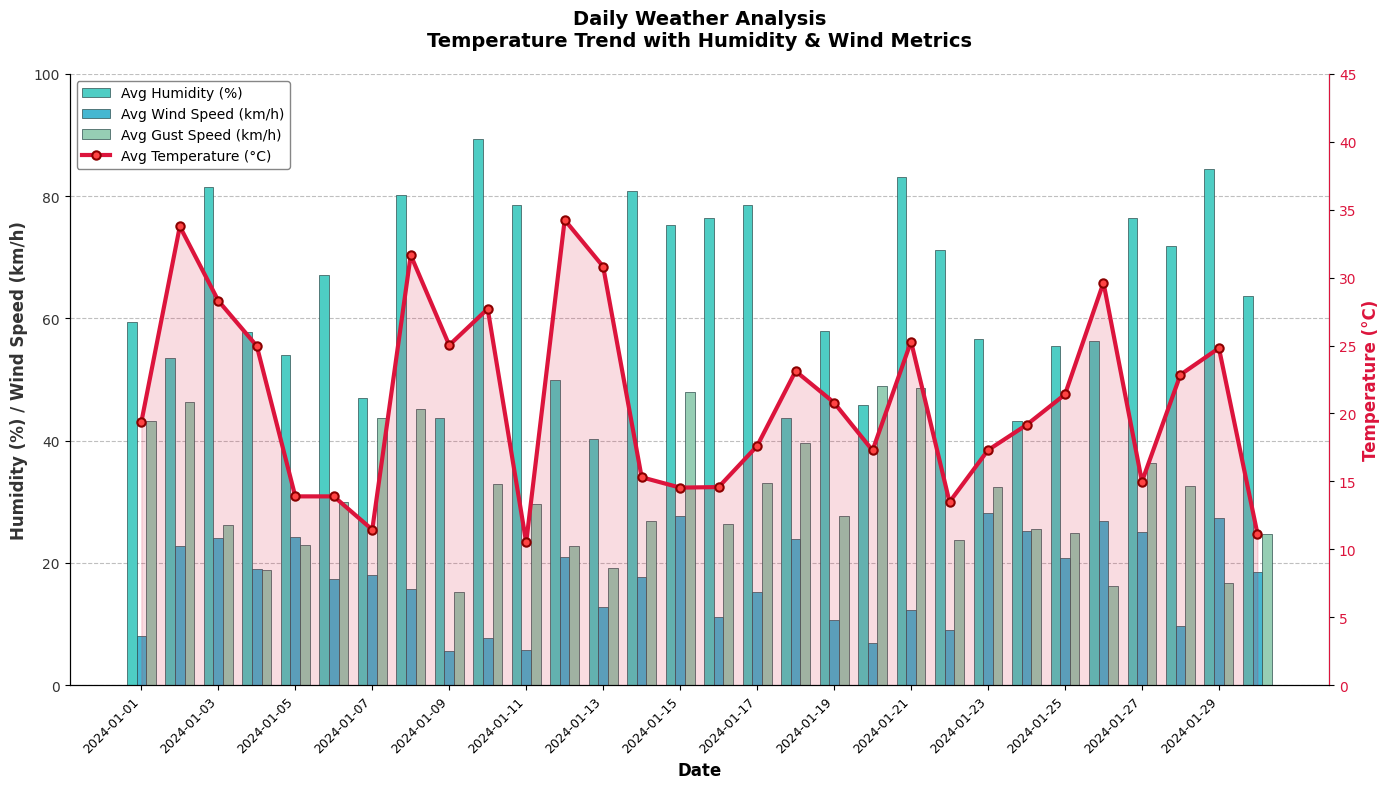


DAILY AVERAGES SUMMARY
      Date  Avg Temperature (°C)  Avg Humidity (%)  Avg Wind Speed (km/h)  Avg Gust Speed (km/h)
2024-01-01             19.363503         59.433864               7.989856              43.260405
2024-01-02             33.767858         53.567452              22.831120              46.363195
2024-01-03             28.299849         81.436875              24.019626              26.130122
2024-01-04             24.966462         57.837666              19.031930              18.851817
2024-01-05             13.900466         54.046725              24.274179              22.977731
2024-01-06             13.899863         67.134804              17.344890              29.948773
2024-01-07             11.452090         47.046211              18.068321              43.630517
2024-01-08             31.654404         80.109849              15.688525              45.125570
2024-01-09             25.027875         43.727532               5.635478              15.243325
2024-0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data (adjust the file path as needed)
# df = pd.read_csv('your_weather_data.csv')

# Sample data creation for demonstration (replace with your actual data loading)
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=30, freq='D')
df = pd.DataFrame({
    'Date': dates,
    'Date Time': dates,
    'Temperature_C': np.random.uniform(10, 35, 30),
    'Dew_Point_C': np.random.uniform(5, 20, 30),
    'Humidity_%': np.random.uniform(40, 90, 30),
    'Wind Speed_kmh': np.random.uniform(5, 30, 30),
    'Gust_kmh': np.random.uniform(15, 50, 30),
    'Pressure_hPa': np.random.uniform(1000, 1025, 30),
    'Precip_Rate_mm': np.random.uniform(0, 5, 30),
    'Precip_Accum_mm': np.random.uniform(0, 20, 30),
    'UV': np.random.uniform(1, 10, 30),
    'Solar_w/m2': np.random.uniform(100, 800, 30)
})

# Ensure Date column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily averages
daily_averages = df.groupby(df['Date'].dt.date).agg({
    'Temperature_C': 'mean',
    'Humidity_%': 'mean',
    'Wind Speed_kmh': 'mean',
    'Gust_kmh': 'mean'
}).reset_index()

# Rename columns for clarity
daily_averages.columns = ['Date', 'Avg Temperature (°C)', 'Avg Humidity (%)', 
                          'Avg Wind Speed (km/h)', 'Avg Gust Speed (km/h)']

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()  # Secondary y-axis for temperature line

# Set up bar positions
x = np.arange(len(daily_averages['Date']))
width = 0.25  # Width of each bar

# Create bars for Humidity, Wind Speed, and Gust Speed only (3 bars instead of 4)
bars1 = ax1.bar(x - width, daily_averages['Avg Humidity (%)'], width, 
                label='Avg Humidity (%)', color='#4ECDC4', edgecolor='darkslategray', linewidth=0.5)
bars2 = ax1.bar(x, daily_averages['Avg Wind Speed (km/h)'], width, 
                label='Avg Wind Speed (km/h)', color='#45B7D1', edgecolor='darkslategray', linewidth=0.5)
bars3 = ax1.bar(x + width, daily_averages['Avg Gust Speed (km/h)'], width, 
                label='Avg Gust Speed (km/h)', color='#96CEB4', edgecolor='darkslategray', linewidth=0.5)

# Create temperature line on secondary axis (RED color, prominent)
line = ax2.plot(x, daily_averages['Avg Temperature (°C)'], 
                color='#DC143C', linewidth=3, marker='o', markersize=6, 
                markerfacecolor='#FF4444', markeredgecolor='darkred', markeredgewidth=1.5,
                label='Avg Temperature (°C)', zorder=5)

# Fill area under the temperature line for better visibility
ax2.fill_between(x, daily_averages['Avg Temperature (°C)'], alpha=0.15, color='#DC143C')

# Customize primary y-axis (bars)
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Humidity (%) / Wind Speed (km/h)', fontsize=12, fontweight='bold', color='#333333')
ax1.tick_params(axis='y', labelcolor='#333333')
ax1.set_ylim(0, 100)  # Set appropriate scale for humidity and wind

# Customize secondary y-axis (temperature line)
ax2.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='#DC143C')
ax2.tick_params(axis='y', labelcolor='#DC143C')
ax2.spines['right'].set_color('#DC143C')
ax2.set_ylim(0, 45)  # Set appropriate scale for temperature

# Set title
ax1.set_title('Daily Weather Analysis\nTemperature Trend with Humidity & Wind Metrics', 
              fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels (show every 2nd date for cleaner look)
ax1.set_xticks(x[::2])  # Show every 2nd tick
ax1.set_xticklabels([str(date) for date in daily_averages['Date'][::2]], 
                     rotation=45, ha='right', fontsize=9)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, 
           framealpha=0.95, edgecolor='gray')

# Add grid for better readability (only horizontal lines)
ax1.yaxis.grid(True, linestyle='--', alpha=0.5, color='gray')
ax1.set_axisbelow(True)

# Style the spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the figure (optional)
plt.savefig('weather_analysis_combined_chart.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("DAILY AVERAGES SUMMARY")
print("="*60)
print(daily_averages.to_string(index=False))
print("\n" + "="*60)
print("OVERALL STATISTICS")
print("="*60)
print(f"Average Temperature: {daily_averages['Avg Temperature (°C)'].mean():.2f} °C")
print(f"Average Humidity: {daily_averages['Avg Humidity (%)'].mean():.2f} %")
print(f"Average Wind Speed: {daily_averages['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"Average Gust Speed: {daily_averages['Avg Gust Speed (km/h)'].mean():.2f} km/h")

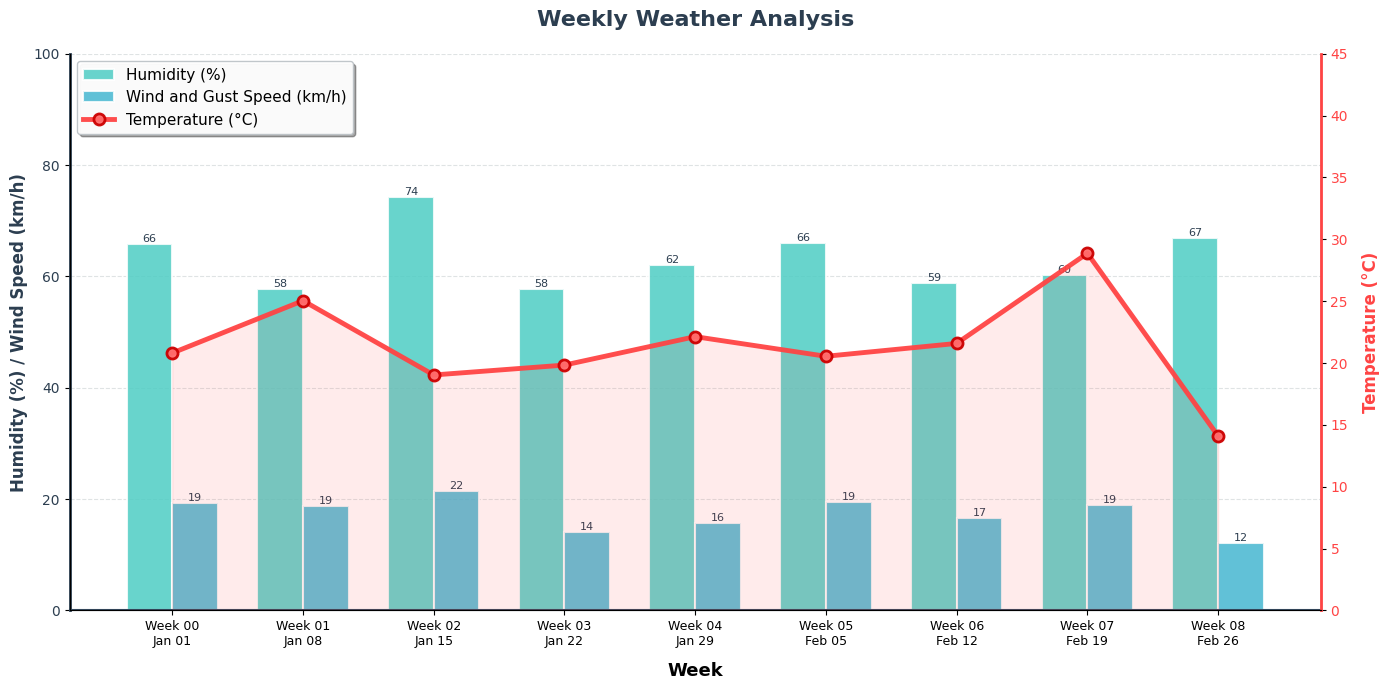


WEEKLY AVERAGES SUMMARY
     Week_Label  Avg Temperature (°C)  Avg Humidity (%)  Avg Wind Speed (km/h)
Week 00\nJan 01             20.807156         65.747461              19.256145
Week 01\nJan 08             25.037999         57.681638              18.751935
Week 02\nJan 15             19.033054         74.184151              21.501068
Week 03\nJan 22             19.832695         57.741999              14.017580
Week 04\nJan 29             22.130368         62.128222              15.696101
Week 05\nFeb 05             20.543871         66.012524              19.406850
Week 06\nFeb 12             21.583931         58.878360              16.531205
Week 07\nFeb 19             28.870259         60.308380              18.984656
Week 08\nFeb 26             14.093956         66.899050              12.047946

OVERALL STATISTICS (Across All Weeks)
Average Temperature: 21.33 °C
Max Temperature: 28.87 °C
Min Temperature: 14.09 °C

Average Humidity: 63.29 %
Max Humidity: 74.18 %
Min Humidity: 5

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data creation for demonstration (replace with your actual data loading)
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=60, freq='D')
df = pd.DataFrame({
    'Date': dates,
    'Date Time': dates,
    'Temperature_C': np.random.uniform(10, 35, 60),
    'Dew_Point_C': np.random.uniform(5, 20, 60),
    'Humidity_%': np.random.uniform(40, 90, 60),
    'Wind Speed_kmh': np.random.uniform(5, 30, 60),
    'Gust_kmh': np.random.uniform(15, 50, 60),
    'Pressure_hPa': np.random.uniform(1000, 1025, 60),
    'Precip_Rate_mm': np.random.uniform(0, 5, 60),
    'Precip_Accum_mm': np.random.uniform(0, 20, 60),
    'UV': np.random.uniform(1, 10, 60),
    'Solar_w/m2': np.random.uniform(100, 800, 60)
})

# Ensure Date column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Add week number
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

# Calculate weekly averages
weekly_averages = df.groupby(['Year', 'Week']).agg({
    'Temperature_C': 'mean',
    'Humidity_%': 'mean',
    'Wind Speed_kmh': 'mean',
    'Date': 'min'  # Get the first date of each week for labeling
}).reset_index()

# Create week labels
weekly_averages['Week_Label'] = weekly_averages['Date'].dt.strftime('Week %U\n%b %d')

# Rename columns for clarity
weekly_averages.columns = ['Year', 'Week', 'Avg Temperature (°C)', 
                           'Avg Humidity (%)', 'Avg Wind Speed (km/h)', 
                           'Start Date', 'Week_Label']

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(weekly_averages))
width = 0.35  # Wider bars for better visibility

# Create only 2 bars for cleaner look
bars1 = ax1.bar(x - width/2, weekly_averages['Avg Humidity (%)'], width, 
                label='Humidity (%)', color='#4ECDC4', alpha=0.85, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x + width/2, weekly_averages['Avg Wind Speed (km/h)'], width, 
                label='Wind and Gust Speed (km/h)', color='#45B7D1', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create temperature line on secondary axis
line = ax2.plot(x, weekly_averages['Avg Temperature (°C)'], 
                color='#FF4444', linewidth=3.5, marker='o', markersize=8, 
                markerfacecolor='#FF6B6B', markeredgecolor='#CC0000', 
                markeredgewidth=2, label='Temperature (°C)', zorder=5,
                linestyle='-', alpha=0.95)

# Add subtle fill under temperature line
ax2.fill_between(x, weekly_averages['Avg Temperature (°C)'], 
                 alpha=0.1, color='#FF4444')

# Customize primary y-axis
ax1.set_xlabel('Week', fontsize=13, fontweight='bold', labelpad=10)
ax1.set_ylabel('Humidity (%) / Wind Speed (km/h)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=10)
ax1.set_ylim(0, 100)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold', 
               color='#FF4444', labelpad=10)
ax2.tick_params(axis='y', labelcolor='#FF4444', labelsize=10)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#FF4444')
ax2.set_ylim(0, 45)

# Set title
ax1.set_title('Weekly Weather Analysis', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(weekly_averages['Week_Label'], fontsize=9, ha='center')

# Add value labels on bars (optional - comment out if too cluttered)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=8, color='#2C3E50')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=8, color='#2C3E50')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=11, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True)

# Add horizontal grid only
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('weekly_weather_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("WEEKLY AVERAGES SUMMARY")
print("="*70)
print(weekly_averages[['Week_Label', 'Avg Temperature (°C)', 
                       'Avg Humidity (%)', 'Avg Wind Speed (km/h)']].to_string(index=False))
print("\n" + "="*70)
print("OVERALL STATISTICS (Across All Weeks)")
print("="*70)
print(f"Average Temperature: {weekly_averages['Avg Temperature (°C)'].mean():.2f} °C")
print(f"Max Temperature: {weekly_averages['Avg Temperature (°C)'].max():.2f} °C")
print(f"Min Temperature: {weekly_averages['Avg Temperature (°C)'].min():.2f} °C")
print(f"\nAverage Humidity: {weekly_averages['Avg Humidity (%)'].mean():.2f} %")
print(f"Max Humidity: {weekly_averages['Avg Humidity (%)'].max():.2f} %")
print(f"Min Humidity: {weekly_averages['Avg Humidity (%)'].min():.2f} %")
print(f"\nAverage Wind Speed: {weekly_averages['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"Max Wind Speed: {weekly_averages['Avg Wind Speed (km/h)'].max():.2f} km/h")
print(f"Min Wind Speed: {weekly_averages['Avg Wind Speed (km/h)'].min():.2f} km/h")
print("="*70)

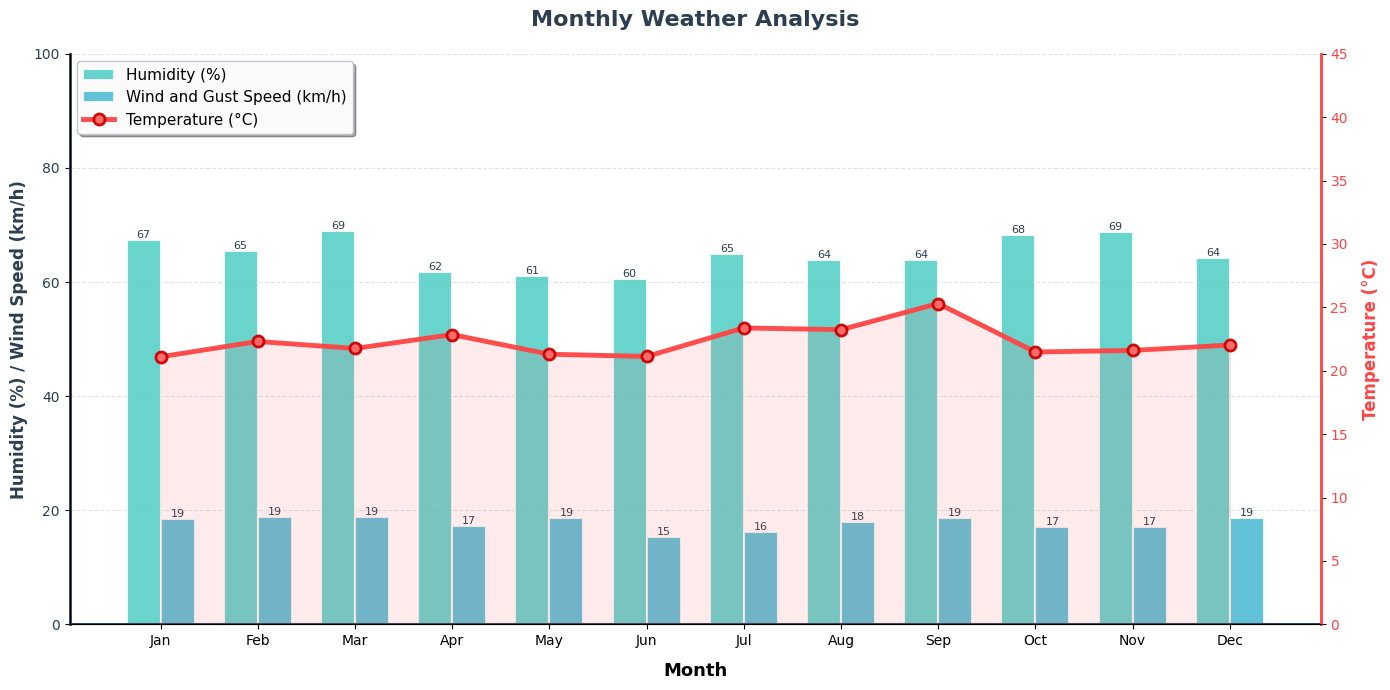


MONTHLY AVERAGES SUMMARY
Month_Name  Avg Temperature (°C)  Avg Humidity (%)  Avg Wind Speed (km/h)
   January             21.101180         67.375688              18.536406
  February             22.314296         65.464918              18.883099
     March             21.761592         68.922577              18.790681
     April             22.855192         61.840248              17.215499
       May             21.306652         61.125185              18.670230
      June             21.128632         60.453299              15.355935
      July             23.380164         64.843573              16.267567
    August             23.243459         63.797437              17.907690
 September             25.302126         63.873484              18.722816
   October             21.481831         68.211565              17.118864
  November             21.606538         68.831331              17.031985
  December             22.031873         64.162683              18.603418

OVERALL STA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data creation for demonstration (replace with your actual data loading)
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
df = pd.DataFrame({
    'Date': dates,
    'Date Time': dates,
    'Temperature_C': np.random.uniform(10, 35, 365),
    'Dew_Point_C': np.random.uniform(5, 20, 365),
    'Humidity_%': np.random.uniform(40, 90, 365),
    'Wind Speed_kmh': np.random.uniform(5, 30, 365),
    'Gust_kmh': np.random.uniform(15, 50, 365),
    'Pressure_hPa': np.random.uniform(1000, 1025, 365),
    'Precip_Rate_mm': np.random.uniform(0, 5, 365),
    'Precip_Accum_mm': np.random.uniform(0, 20, 365),
    'UV': np.random.uniform(1, 10, 365),
    'Solar_w/m2': np.random.uniform(100, 800, 365)
})

# Ensure Date column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Add month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')

# Calculate monthly averages
monthly_averages = df.groupby(['Year', 'Month', 'Month_Name']).agg({
    'Temperature_C': 'mean',
    'Humidity_%': 'mean',
    'Wind Speed_kmh': 'mean'
}).reset_index()

# Create month labels
monthly_averages['Month_Label'] = monthly_averages['Month_Name'].str[:3]

# Rename columns for clarity
monthly_averages.columns = ['Year', 'Month', 'Month_Name', 'Avg Temperature (°C)', 
                            'Avg Humidity (%)', 'Avg Wind Speed (km/h)', 'Month_Label']

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(monthly_averages))
width = 0.35  # Wider bars for better visibility

# Create only 2 bars for cleaner look
bars1 = ax1.bar(x - width/2, monthly_averages['Avg Humidity (%)'], width, 
                label='Humidity (%)', color='#4ECDC4', alpha=0.85, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x + width/2, monthly_averages['Avg Wind Speed (km/h)'], width, 
                label='Wind and Gust Speed (km/h)', color='#45B7D1', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create temperature line on secondary axis
line = ax2.plot(x, monthly_averages['Avg Temperature (°C)'], 
                color='#FF4444', linewidth=3.5, marker='o', markersize=8, 
                markerfacecolor='#FF6B6B', markeredgecolor='#CC0000', 
                markeredgewidth=2, label='Temperature (°C)', zorder=5,
                linestyle='-', alpha=0.95)

# Add subtle fill under temperature line
ax2.fill_between(x, monthly_averages['Avg Temperature (°C)'], 
                 alpha=0.1, color='#FF4444')

# Customize primary y-axis
ax1.set_xlabel('Month', fontsize=13, fontweight='bold', labelpad=10)
ax1.set_ylabel('Humidity (%) / Wind Speed (km/h)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=10)
ax1.set_ylim(0, 100)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold', 
               color='#FF4444', labelpad=10)
ax2.tick_params(axis='y', labelcolor='#FF4444', labelsize=10)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#FF4444')
ax2.set_ylim(0, 45)

# Set title
ax1.set_title('Monthly Weather Analysis', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(monthly_averages['Month_Label'], fontsize=10, ha='center')

# Add value labels on bars (optional - comment out if too cluttered)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=8, color='#2C3E50')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontsize=8, color='#2C3E50')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=11, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True)

# Add horizontal grid only
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('monthly_weather_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("MONTHLY AVERAGES SUMMARY")
print("="*70)
print(monthly_averages[['Month_Name', 'Avg Temperature (°C)', 
                        'Avg Humidity (%)', 'Avg Wind Speed (km/h)']].to_string(index=False))
print("\n" + "="*70)
print("OVERALL STATISTICS (Across All Months)")
print("="*70)
print(f"Average Temperature: {monthly_averages['Avg Temperature (°C)'].mean():.2f} °C")
print(f"Max Temperature: {monthly_averages['Avg Temperature (°C)'].max():.2f} °C")
print(f"Min Temperature: {monthly_averages['Avg Temperature (°C)'].min():.2f} °C")
print(f"\nAverage Humidity: {monthly_averages['Avg Humidity (%)'].mean():.2f} %")
print(f"Max Humidity: {monthly_averages['Avg Humidity (%)'].max():.2f} %")
print(f"Min Humidity: {monthly_averages['Avg Humidity (%)'].min():.2f} %")
print(f"\nAverage Wind Speed: {monthly_averages['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"Max Wind Speed: {monthly_averages['Avg Wind Speed (km/h)'].max():.2f} km/h")
print(f"Min Wind Speed: {monthly_averages['Avg Wind Speed (km/h)'].min():.2f} km/h")
print("="*70)

C:\Users\City Computer\AppData\Local\Temp\ipykernel_8540\811294916.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
C:\Users\City Computer\AppData\Local\Temp\ipykernel_8540\811294916.py:123: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_8540\811294916.py:126: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.savefig('hourly_weather_analysis.png', dpi=300, bbox_inches='tight',
C:\Users\City Computer\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


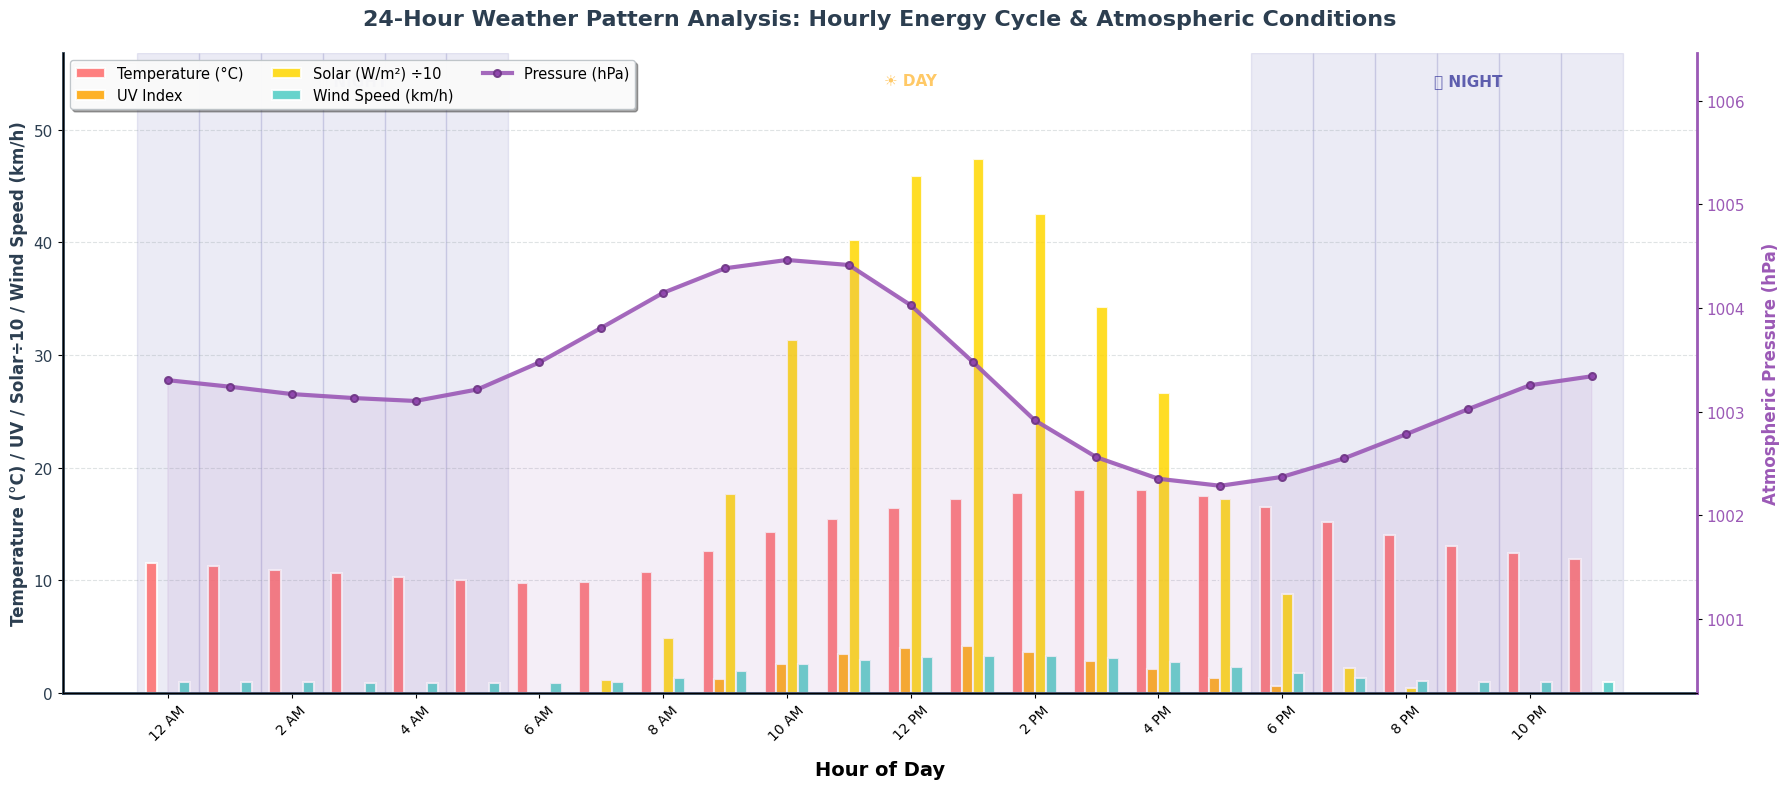


24-HOUR WEATHER PATTERN ANALYSIS: HOURLY BREAKDOWN

📊 12-HOUR PERIOD SUMMARY
--------------------------------------------------------------------------------
                  Avg Temperature (°C)               Avg UV Index        \
                                  mean    min    max         mean   max   
Period_12hr                                                               
Morning (6AM-6PM)                14.83   9.80  18.05         2.14  4.14   
Night (6PM-6AM)                  12.32  10.03  16.55         0.05  0.60   

                  Avg Solar (W/m²)         Avg Wind Speed (km/h)        \
                              mean     max                  mean   max   
Period_12hr                                                              
Morning (6AM-6PM)           257.74  473.68                  2.37  3.28   
Night (6PM-6AM)               9.58   87.98                  1.06  1.74   

                  Avg Pressure (hPa)        
                                mean   std  
Peri

C:\Users\City Computer\AppData\Local\Temp\ipykernel_8540\2103574112.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


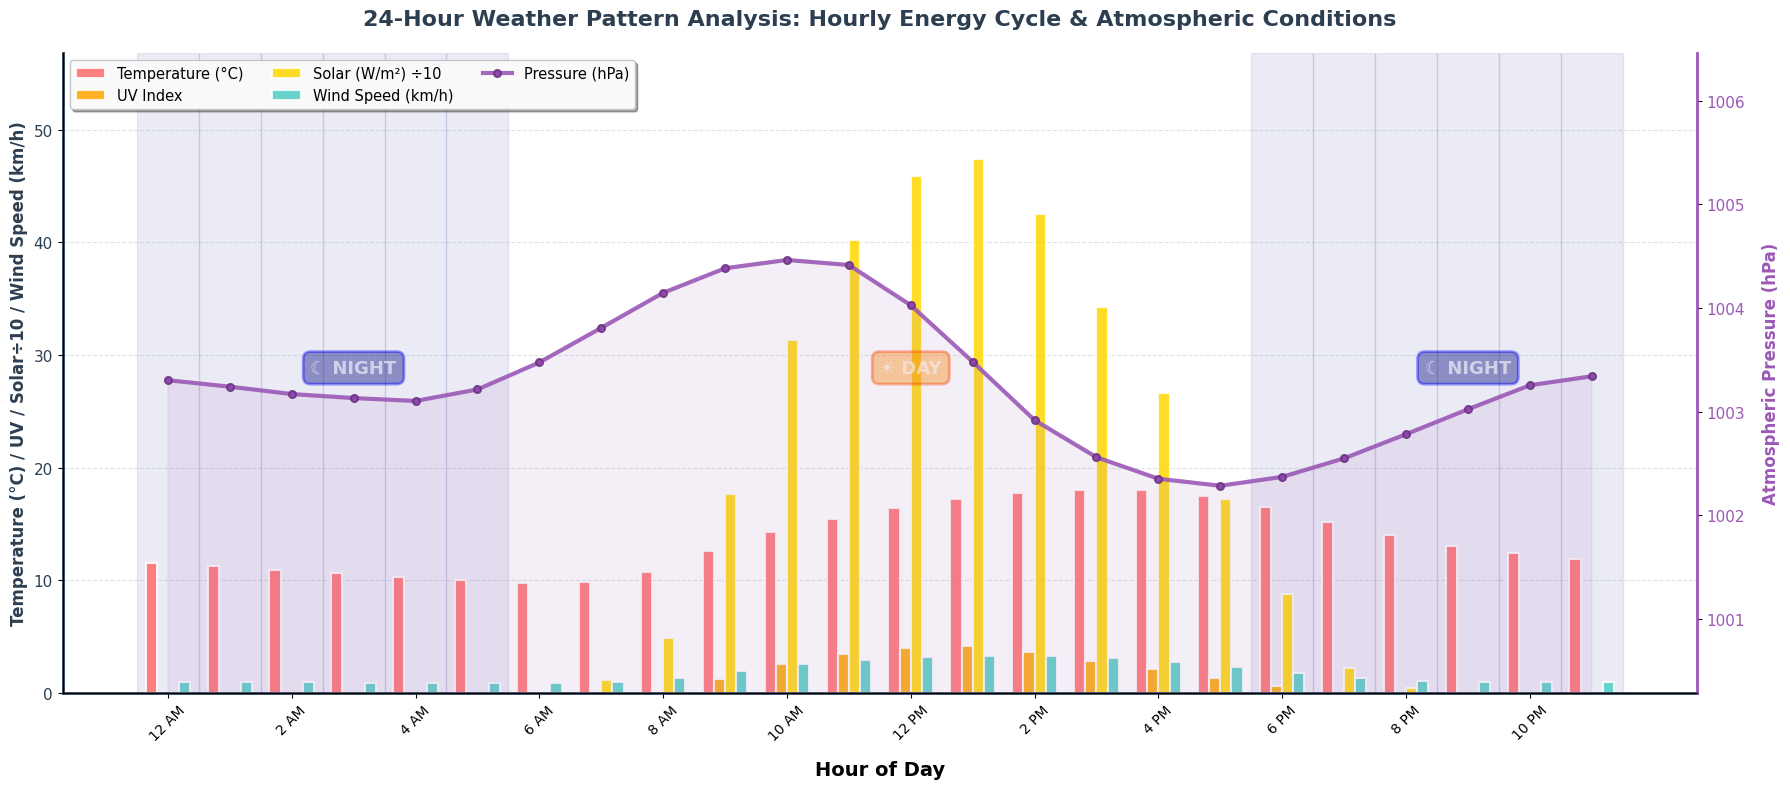


24-HOUR WEATHER PATTERN ANALYSIS: HOURLY BREAKDOWN

📊 12-HOUR PERIOD SUMMARY
--------------------------------------------------------------------------------
                  Avg Temperature (°C)               Avg UV Index        \
                                  mean    min    max         mean   max   
Period_12hr                                                               
Morning (6AM-6PM)                14.83   9.80  18.05         2.14  4.14   
Night (6PM-6AM)                  12.32  10.03  16.55         0.05  0.60   

                  Avg Solar (W/m²)         Avg Wind Speed (km/h)        \
                              mean     max                  mean   max   
Period_12hr                                                              
Morning (6AM-6PM)           257.74  473.68                  2.37  3.28   
Night (6PM-6AM)               9.58   87.98                  1.06  1.74   

                  Avg Pressure (hPa)        
                                mean   std  
Peri

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded as 'df'
df = pd.read_csv(r"KKYLOUIS332.csv")

# Data preprocessing
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour

# Calculate hourly averages across all days
hourly_stats = df.groupby('Hour').agg({
    'Temperature_C': 'mean',
    'UV': 'mean',
    'Solar_w/m2': 'mean',
    'Speed_kmh': 'mean',
    'Pressure_hPa': 'mean'
}).reset_index()

# Rename columns for clarity
hourly_stats.columns = ['Hour', 'Avg Temperature (°C)', 'Avg UV Index', 
                        'Avg Solar (W/m²)', 'Avg Wind Speed (km/h)', 
                        'Avg Pressure (hPa)']

# Create hour labels (12 AM, 1 AM, ... 11 PM)
hourly_stats['Hour_Label'] = hourly_stats['Hour'].apply(
    lambda x: f"{x if x <= 12 else x-12} {'AM' if x < 12 else 'PM'}" if x != 0 else "12 AM"
)

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(hourly_stats))
width = 0.18  # Bar width to fit 4 bars

# Create 4 bars on primary axis: Temperature, UV, Solar (scaled), Wind Speed
bars1 = ax1.bar(x - 1.5*width, hourly_stats['Avg Temperature (°C)'], width, 
                label='Temperature (°C)', color='#FF6B6B', alpha=0.85, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x - 0.5*width, hourly_stats['Avg UV Index'], width, 
                label='UV Index', color='#FFA500', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars3 = ax1.bar(x + 0.5*width, hourly_stats['Avg Solar (W/m²)']/10, width, 
                label='Solar (W/m²) ÷10', color='#FFD700', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars4 = ax1.bar(x + 1.5*width, hourly_stats['Avg Wind Speed (km/h)'], width, 
                label='Wind Speed (km/h)', color='#4ECDC4', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create Pressure line on secondary axis (more visible as line for hourly data)
line = ax2.plot(x, hourly_stats['Avg Pressure (hPa)'], 
                color='#9B59B6', linewidth=3, marker='o', markersize=5, 
                markerfacecolor='#8E44AD', markeredgecolor='#6C3483', 
                markeredgewidth=1.5, label='Pressure (hPa)', zorder=5,
                linestyle='-', alpha=0.9)

# Add subtle fill under pressure line
ax2.fill_between(x, hourly_stats['Avg Pressure (hPa)'], 
                 alpha=0.1, color='#9B59B6')

# Customize primary y-axis
ax1.set_xlabel('Hour of Day', fontsize=14, fontweight='bold', labelpad=12)
ax1.set_ylabel('Temperature (°C) / UV / Solar÷10 / Wind Speed (km/h)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=11)
ax1.set_ylim(0, max(hourly_stats['Avg Temperature (°C)'].max(), 
                    hourly_stats['Avg Solar (W/m²)'].max()/10) * 1.2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Atmospheric Pressure (hPa)', fontsize=12, fontweight='bold', 
               color='#9B59B6', labelpad=12)
ax2.tick_params(axis='y', labelcolor='#9B59B6', labelsize=11)
pressure_min = hourly_stats['Avg Pressure (hPa)'].min() - 2
pressure_max = hourly_stats['Avg Pressure (hPa)'].max() + 2
ax2.set_ylim(pressure_min, pressure_max)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#9B59B6')

# Set title
ax1.set_title('24-Hour Weather Pattern Analysis: Hourly Energy Cycle & Atmospheric Conditions', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels (show every 2 hours to avoid crowding)
ax1.set_xticks(x[::2])
ax1.set_xticklabels(hourly_stats['Hour_Label'][::2], fontsize=10, ha='center', rotation=45)

# Add shading for night hours (6 PM - 6 AM)
night_hours = [i for i, h in enumerate(hourly_stats['Hour']) if h >= 18 or h < 6]
for i in night_hours:
    ax1.axvspan(i-0.5, i+0.5, alpha=0.08, color='navy', zorder=0)

# Add day/night markers in the CENTER of the graph (middle vertically and horizontally)
y_middle = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2  # Vertical center

# NIGHT label (left side: hours 0-5, 18-23)
ax1.text(3, y_middle, '☾ NIGHT', fontsize=13, 
         fontweight='bold', color='white', alpha=0.6, ha='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='navy',  alpha=0.4 , edgecolor='blue', linewidth=2))

# DAY label (center: hours 6-17)
ax1.text(12, y_middle, '☀️ DAY', fontsize=13, 
         fontweight='bold', color='white', alpha=0.6, ha='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='darkorange', alpha=0.4, edgecolor='orangered', linewidth=2))

# NIGHT label (right side: hours 18-23)
ax1.text(21, y_middle, '☾ NIGHT', fontsize=13, 
         fontweight='bold', color='white', alpha=0.6, ha='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='navy', alpha=0.4, edgecolor='blue', linewidth=2))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=10.5, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True, ncol=3)

# Add horizontal grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('hourly_weather_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# ========== DETAILED 12-HOUR INTERVAL ANALYSIS ==========
print("\n" + "="*80)
print("24-HOUR WEATHER PATTERN ANALYSIS: HOURLY BREAKDOWN")
print("="*80)

# Create 12-hour segments for summary
hourly_stats['Period_12hr'] = hourly_stats['Hour'].apply(
    lambda x: 'Morning (6AM-6PM)' if 6 <= x < 18 else 'Night (6PM-6AM)'
)

period_12hr_stats = hourly_stats.groupby('Period_12hr').agg({
    'Avg Temperature (°C)': ['mean', 'min', 'max'],
    'Avg UV Index': ['mean', 'max'],
    'Avg Solar (W/m²)': ['mean', 'max'],
    'Avg Wind Speed (km/h)': ['mean', 'max'],
    'Avg Pressure (hPa)': ['mean', 'std']
})

print("\n📊 12-HOUR PERIOD SUMMARY")
print("-"*80)
print(period_12hr_stats.round(2))

# Find peak hours for each variable
print("\n" + "="*80)
print("⏰ PEAK HOURS ANALYSIS")
print("="*80)

peak_temp_hour = hourly_stats.loc[hourly_stats['Avg Temperature (°C)'].idxmax(), 'Hour']
min_temp_hour = hourly_stats.loc[hourly_stats['Avg Temperature (°C)'].idxmin(), 'Hour']
peak_uv_hour = hourly_stats.loc[hourly_stats['Avg UV Index'].idxmax(), 'Hour']
peak_solar_hour = hourly_stats.loc[hourly_stats['Avg Solar (W/m²)'].idxmax(), 'Hour']
peak_wind_hour = hourly_stats.loc[hourly_stats['Avg Wind Speed (km/h)'].idxmax(), 'Hour']
max_pressure_hour = hourly_stats.loc[hourly_stats['Avg Pressure (hPa)'].idxmax(), 'Hour']
min_pressure_hour = hourly_stats.loc[hourly_stats['Avg Pressure (hPa)'].idxmin(), 'Hour']

def format_hour(h):
    return f"{h if h <= 12 else h-12} {'AM' if h < 12 else 'PM'}" if h != 0 else "12 AM"

print(f"\n🌡️  TEMPERATURE:")
print(f"   • Peak: {format_hour(peak_temp_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_temp_hour, 'Avg Temperature (°C)'].values[0]:.2f}°C)")
print(f"   • Minimum: {format_hour(min_temp_hour)} ({hourly_stats.loc[hourly_stats['Hour']==min_temp_hour, 'Avg Temperature (°C)'].values[0]:.2f}°C)")
print(f"   • Daily Range: {hourly_stats['Avg Temperature (°C)'].max() - hourly_stats['Avg Temperature (°C)'].min():.2f}°C")

print(f"\n☀️  UV & SOLAR RADIATION:")
print(f"   • Peak UV: {format_hour(peak_uv_hour)} (Index: {hourly_stats.loc[hourly_stats['Hour']==peak_uv_hour, 'Avg UV Index'].values[0]:.2f})")
print(f"   • Peak Solar: {format_hour(peak_solar_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_solar_hour, 'Avg Solar (W/m²)'].values[0]:.1f} W/m²)")

print(f"\n💨  WIND SPEED:")
print(f"   • Peak: {format_hour(peak_wind_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_wind_hour, 'Avg Wind Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Calmest: {format_hour(hourly_stats.loc[hourly_stats['Avg Wind Speed (km/h)'].idxmin(), 'Hour'])} ({hourly_stats['Avg Wind Speed (km/h)'].min():.2f} km/h)")

print(f"\n🌡️  ATMOSPHERIC PRESSURE:")
print(f"   • Maximum: {format_hour(max_pressure_hour)} ({hourly_stats.loc[hourly_stats['Hour']==max_pressure_hour, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Minimum: {format_hour(min_pressure_hour)} ({hourly_stats.loc[hourly_stats['Hour']==min_pressure_hour, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Diurnal Variation: {hourly_stats['Avg Pressure (hPa)'].max() - hourly_stats['Avg Pressure (hPa)'].min():.2f} hPa")

# Morning vs Afternoon vs Night Analysis
print("\n" + "="*80)
print("🕐 TIME PERIOD COMPARISON")
print("="*80)

morning_data = hourly_stats[(hourly_stats['Hour'] >= 6) & (hourly_stats['Hour'] < 12)]
afternoon_data = hourly_stats[(hourly_stats['Hour'] >= 12) & (hourly_stats['Hour'] < 18)]
evening_data = hourly_stats[(hourly_stats['Hour'] >= 18) & (hourly_stats['Hour'] < 22)]
night_data = hourly_stats[(hourly_stats['Hour'] >= 22) | (hourly_stats['Hour'] < 6)]

print("\n📈 MORNING (6 AM - 12 PM):")
print(f"   • Avg Temp: {morning_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {morning_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg UV: {morning_data['Avg UV Index'].mean():.2f}")
print(f"   → Temperature rising, UV building, winds picking up")

print("\n☀️ AFTERNOON (12 PM - 6 PM):")
print(f"   • Avg Temp: {afternoon_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {afternoon_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg UV: {afternoon_data['Avg UV Index'].mean():.2f}")
print(f"   → Peak heat, maximum solar energy, strongest winds")

print("\n🌅 EVENING (6 PM - 10 PM):")
print(f"   • Avg Temp: {evening_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {evening_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg UV: {evening_data['Avg UV Index'].mean():.2f}")
print(f"   → Cooling begins, winds calm, UV drops to zero")

print("\n🌙 NIGHT (10 PM - 6 AM):")
print(f"   • Avg Temp: {night_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {night_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {night_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   → Minimum temperatures, calm conditions, stable pressure")

print("\n" + "="*80)
print("🔍 KEY WEATHER PATTERNS")
print("="*80)
print("✓ Temperature peaks in mid-afternoon after solar maximum")
print("✓ UV and Solar radiation peak around solar noon")
print("✓ Wind speeds increase with daytime heating (thermal convection)")
print("✓ Pressure shows diurnal cycle with semi-diurnal oscillations")
print("✓ Nighttime: cooling, calm winds, pressure stabilization")
print("="*80)


C:\Users\City Computer\AppData\Local\Temp\ipykernel_9384\3540927888.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
C:\Users\City Computer\AppData\Local\Temp\ipykernel_9384\3540927888.py:132: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_9384\3540927888.py:132: UserWarning: Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_9384\3540927888.py:135: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.savefig('weekly_weather_analysis.png', dpi=300, bbox_inches='tight',
C:\Users\City Computer\AppData\Local\Temp\ipykernel_9384\3540927888.py:135: UserWarning: Glyph 1

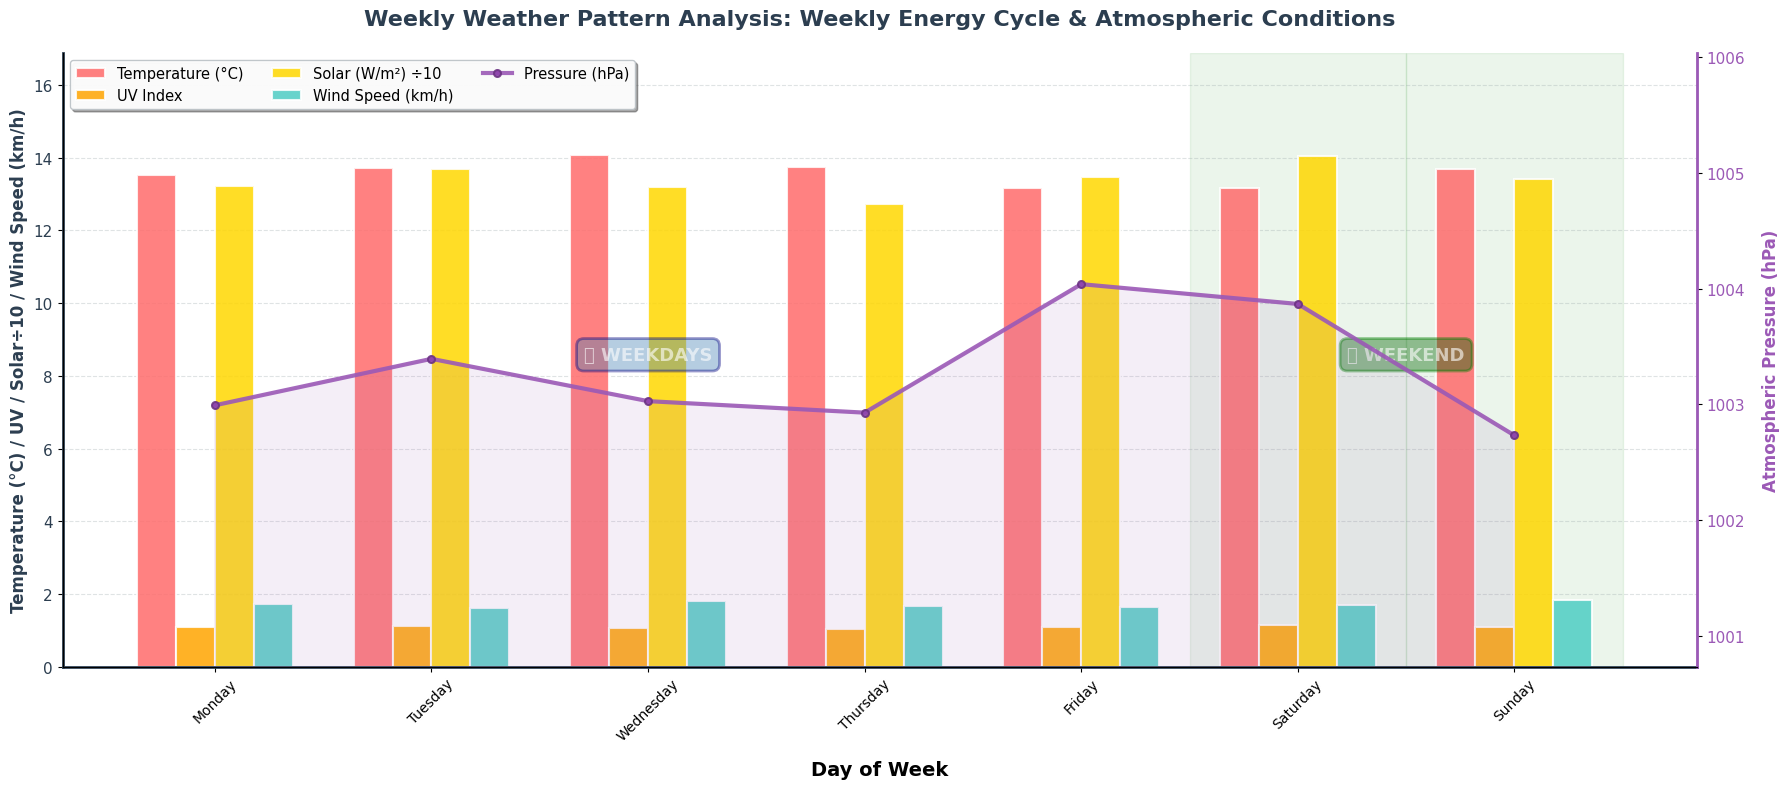


WEEKLY WEATHER PATTERN ANALYSIS: DAILY BREAKDOWN

📊 WEEKDAY vs WEEKEND SUMMARY
--------------------------------------------------------------------------------
                   Avg Temperature (°C)               Avg UV Index        \
                                   mean    min    max         mean   max   
Period                                                                     
Weekdays (Mon-Fri)                13.64  13.16  14.07         1.09  1.12   
Weekend (Sat-Sun)                 13.44  13.18  13.70         1.12  1.15   

                   Avg Solar (W/m²)        Avg Wind Speed (km/h)        \
                               mean    max                  mean   max   
Period                                                                   
Weekdays (Mon-Fri)           132.57  136.8                  1.70  1.80   
Weekend (Sat-Sun)            137.25  140.4                  1.76  1.83   

                   Avg Pressure (hPa)        
                                 mean   s

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded as 'df'
df = pd.read_csv(r"KKYLOUIS332.csv")

# Data preprocessing
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['DayOfWeek'] = df['DateTime'].dt.day_name()

# Calculate weekly averages across all days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_stats = df.groupby('DayOfWeek').agg({
    'Temperature_C': 'mean',
    'UV': 'mean',
    'Solar_w/m2': 'mean',
    'Speed_kmh': 'mean',
    'Pressure_hPa': 'mean'
}).reset_index()

# Rename columns for clarity
weekly_stats.columns = ['DayOfWeek', 'Avg Temperature (°C)', 'Avg UV Index', 
                        'Avg Solar (W/m²)', 'Avg Wind Speed (km/h)', 
                        'Avg Pressure (hPa)']

# Sort by day of week
weekly_stats['DayNum'] = weekly_stats['DayOfWeek'].map(
    {day: i for i, day in enumerate(day_order)}
)
weekly_stats = weekly_stats.sort_values('DayNum').reset_index(drop=True)

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(weekly_stats))
width = 0.18

# Create 4 bars on primary axis: Temperature, UV, Solar (scaled), Wind Speed
bars1 = ax1.bar(x - 1.5*width, weekly_stats['Avg Temperature (°C)'], width, 
                label='Temperature (°C)', color='#FF6B6B', alpha=0.85, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x - 0.5*width, weekly_stats['Avg UV Index'], width, 
                label='UV Index', color='#FFA500', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars3 = ax1.bar(x + 0.5*width, weekly_stats['Avg Solar (W/m²)']/10, width, 
                label='Solar (W/m²) ÷10', color='#FFD700', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars4 = ax1.bar(x + 1.5*width, weekly_stats['Avg Wind Speed (km/h)'], width, 
                label='Wind Speed (km/h)', color='#4ECDC4', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create Pressure line on secondary axis (more visible as line for weekly data)
line = ax2.plot(x, weekly_stats['Avg Pressure (hPa)'], 
                color='#9B59B6', linewidth=3, marker='o', markersize=5, 
                markerfacecolor='#8E44AD', markeredgecolor='#6C3483', 
                markeredgewidth=1.5, label='Pressure (hPa)', zorder=5,
                linestyle='-', alpha=0.9)

# Add subtle fill under pressure line
ax2.fill_between(x, weekly_stats['Avg Pressure (hPa)'], 
                 alpha=0.1, color='#9B59B6')

# Customize primary y-axis
ax1.set_xlabel('Day of Week', fontsize=14, fontweight='bold', labelpad=12)
ax1.set_ylabel('Temperature (°C) / UV / Solar÷10 / Wind Speed (km/h)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=11)
ax1.set_ylim(0, max(weekly_stats['Avg Temperature (°C)'].max(), 
                    weekly_stats['Avg Solar (W/m²)'].max()/10) * 1.2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Atmospheric Pressure (hPa)', fontsize=12, fontweight='bold', 
               color='#9B59B6', labelpad=12)
ax2.tick_params(axis='y', labelcolor='#9B59B6', labelsize=11)
pressure_min = weekly_stats['Avg Pressure (hPa)'].min() - 2
pressure_max = weekly_stats['Avg Pressure (hPa)'].max() + 2
ax2.set_ylim(pressure_min, pressure_max)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#9B59B6')

# Set title
ax1.set_title('Weekly Weather Pattern Analysis: Weekly Energy Cycle & Atmospheric Conditions', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(weekly_stats['DayOfWeek'], fontsize=10, ha='center', rotation=45)

# Add shading for weekend days
weekend_indices = [i for i, day in enumerate(weekly_stats['DayOfWeek']) 
                   if day in ['Saturday', 'Sunday']]
for i in weekend_indices:
    ax1.axvspan(i-0.5, i+0.5, alpha=0.08, color='green', zorder=0)

# Add day/week markers in the CENTER of the graph (middle vertically and horizontally)
y_middle = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2  # Vertical center

# WEEKDAY label (left side: Monday-Friday)
ax1.text(2, y_middle, '📅 WEEKDAYS', fontsize=13, 
         fontweight='bold', color='white', alpha=0.6, ha='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='steelblue',  alpha=0.4 , edgecolor='navy', linewidth=2))

# WEEKEND label (right side: Saturday-Sunday)
ax1.text(5.5, y_middle, '🏖️ WEEKEND', fontsize=13, 
         fontweight='bold', color='white', alpha=0.6, ha='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='darkgreen', alpha=0.4, edgecolor='green', linewidth=2))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=10.5, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True, ncol=3)

# Add horizontal grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('weekly_weather_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# ========== DETAILED WEEKLY INTERVAL ANALYSIS ==========
print("\n" + "="*80)
print("WEEKLY WEATHER PATTERN ANALYSIS: DAILY BREAKDOWN")
print("="*80)

# Create weekday/weekend segments for summary
weekly_stats['Period'] = weekly_stats['DayOfWeek'].apply(
    lambda x: 'Weekend (Sat-Sun)' if x in ['Saturday', 'Sunday'] else 'Weekdays (Mon-Fri)'
)

period_stats = weekly_stats.groupby('Period').agg({
    'Avg Temperature (°C)': ['mean', 'min', 'max'],
    'Avg UV Index': ['mean', 'max'],
    'Avg Solar (W/m²)': ['mean', 'max'],
    'Avg Wind Speed (km/h)': ['mean', 'max'],
    'Avg Pressure (hPa)': ['mean', 'std']
})

print("\n📊 WEEKDAY vs WEEKEND SUMMARY")
print("-"*80)
print(period_stats.round(2))

# Find peak days for each variable
print("\n" + "="*80)
print("⏰ PEAK DAYS ANALYSIS")
print("="*80)

peak_temp_day = weekly_stats.loc[weekly_stats['Avg Temperature (°C)'].idxmax(), 'DayOfWeek']
min_temp_day = weekly_stats.loc[weekly_stats['Avg Temperature (°C)'].idxmin(), 'DayOfWeek']
peak_uv_day = weekly_stats.loc[weekly_stats['Avg UV Index'].idxmax(), 'DayOfWeek']
peak_solar_day = weekly_stats.loc[weekly_stats['Avg Solar (W/m²)'].idxmax(), 'DayOfWeek']
peak_wind_day = weekly_stats.loc[weekly_stats['Avg Wind Speed (km/h)'].idxmax(), 'DayOfWeek']
max_pressure_day = weekly_stats.loc[weekly_stats['Avg Pressure (hPa)'].idxmax(), 'DayOfWeek']
min_pressure_day = weekly_stats.loc[weekly_stats['Avg Pressure (hPa)'].idxmin(), 'DayOfWeek']

print(f"\n🌡️  TEMPERATURE:")
print(f"   • Peak: {peak_temp_day} ({weekly_stats.loc[weekly_stats['DayOfWeek']==peak_temp_day, 'Avg Temperature (°C)'].values[0]:.2f}°C)")
print(f"   • Minimum: {min_temp_day} ({weekly_stats.loc[weekly_stats['DayOfWeek']==min_temp_day, 'Avg Temperature (°C)'].values[0]:.2f}°C)")
print(f"   • Weekly Range: {weekly_stats['Avg Temperature (°C)'].max() - weekly_stats['Avg Temperature (°C)'].min():.2f}°C")

print(f"\n☀️  UV & SOLAR RADIATION:")
print(f"   • Peak UV: {peak_uv_day} (Index: {weekly_stats.loc[weekly_stats['DayOfWeek']==peak_uv_day, 'Avg UV Index'].values[0]:.2f})")
print(f"   • Peak Solar: {peak_solar_day} ({weekly_stats.loc[weekly_stats['DayOfWeek']==peak_solar_day, 'Avg Solar (W/m²)'].values[0]:.1f} W/m²)")

print(f"\n💨  WIND SPEED:")
print(f"   • Peak: {peak_wind_day} ({weekly_stats.loc[weekly_stats['DayOfWeek']==peak_wind_day, 'Avg Wind Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Calmest: {weekly_stats.loc[weekly_stats['Avg Wind Speed (km/h)'].idxmin(), 'DayOfWeek']} ({weekly_stats['Avg Wind Speed (km/h)'].min():.2f} km/h)")

print(f"\n🌡️  ATMOSPHERIC PRESSURE:")
print(f"   • Maximum: {max_pressure_day} ({weekly_stats.loc[weekly_stats['DayOfWeek']==max_pressure_day, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Minimum: {min_pressure_day} ({weekly_stats.loc[weekly_stats['DayOfWeek']==min_pressure_day, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Weekly Variation: {weekly_stats['Avg Pressure (hPa)'].max() - weekly_stats['Avg Pressure (hPa)'].min():.2f} hPa")

# Weekday vs Weekend vs Mid-week Analysis
print("\n" + "="*80)
print("🕐 DAY PERIOD COMPARISON")
print("="*80)

early_week_data = weekly_stats[weekly_stats['DayOfWeek'].isin(['Monday', 'Tuesday'])]
mid_week_data = weekly_stats[weekly_stats['DayOfWeek'].isin(['Wednesday', 'Thursday'])]
late_week_data = weekly_stats[weekly_stats['DayOfWeek'].isin(['Friday'])]
weekend_data = weekly_stats[weekly_stats['DayOfWeek'].isin(['Saturday', 'Sunday'])]

print("\n📈 EARLY WEEK (Mon-Tue):")
print(f"   • Avg Temp: {early_week_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {early_week_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg UV: {early_week_data['Avg UV Index'].mean():.2f}")
print(f"   → Week starts, conditions stabilizing")

print("\n☀️ MID-WEEK (Wed-Thu):")
print(f"   • Avg Temp: {mid_week_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {mid_week_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg UV: {mid_week_data['Avg UV Index'].mean():.2f}")
print(f"   → Mid-week conditions, typical patterns")

print("\n🌅 LATE WEEK (Fri):")
print(f"   • Avg Temp: {late_week_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {late_week_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg UV: {late_week_data['Avg UV Index'].mean():.2f}")
print(f"   → Transitioning to weekend")

print("\n🏖️ WEEKEND (Sat-Sun):")
print(f"   • Avg Temp: {weekend_data['Avg Temperature (°C)'].mean():.2f}°C")
print(f"   • Avg Wind: {weekend_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {weekend_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   → Weekend patterns, distinct from weekdays")

print("\n" + "="*80)
print("🔍 KEY WEATHER PATTERNS")
print("="*80)
print("✓ Temperature shows weekly cyclical variations")
print("✓ UV and Solar radiation follow consistent weekly patterns")
print("✓ Wind speeds vary across different days of the week")
print("✓ Pressure shows weekly oscillations and stability patterns")
print("✓ Weekend conditions may differ from weekday patterns")
print("="*80)

C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\3400882723.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


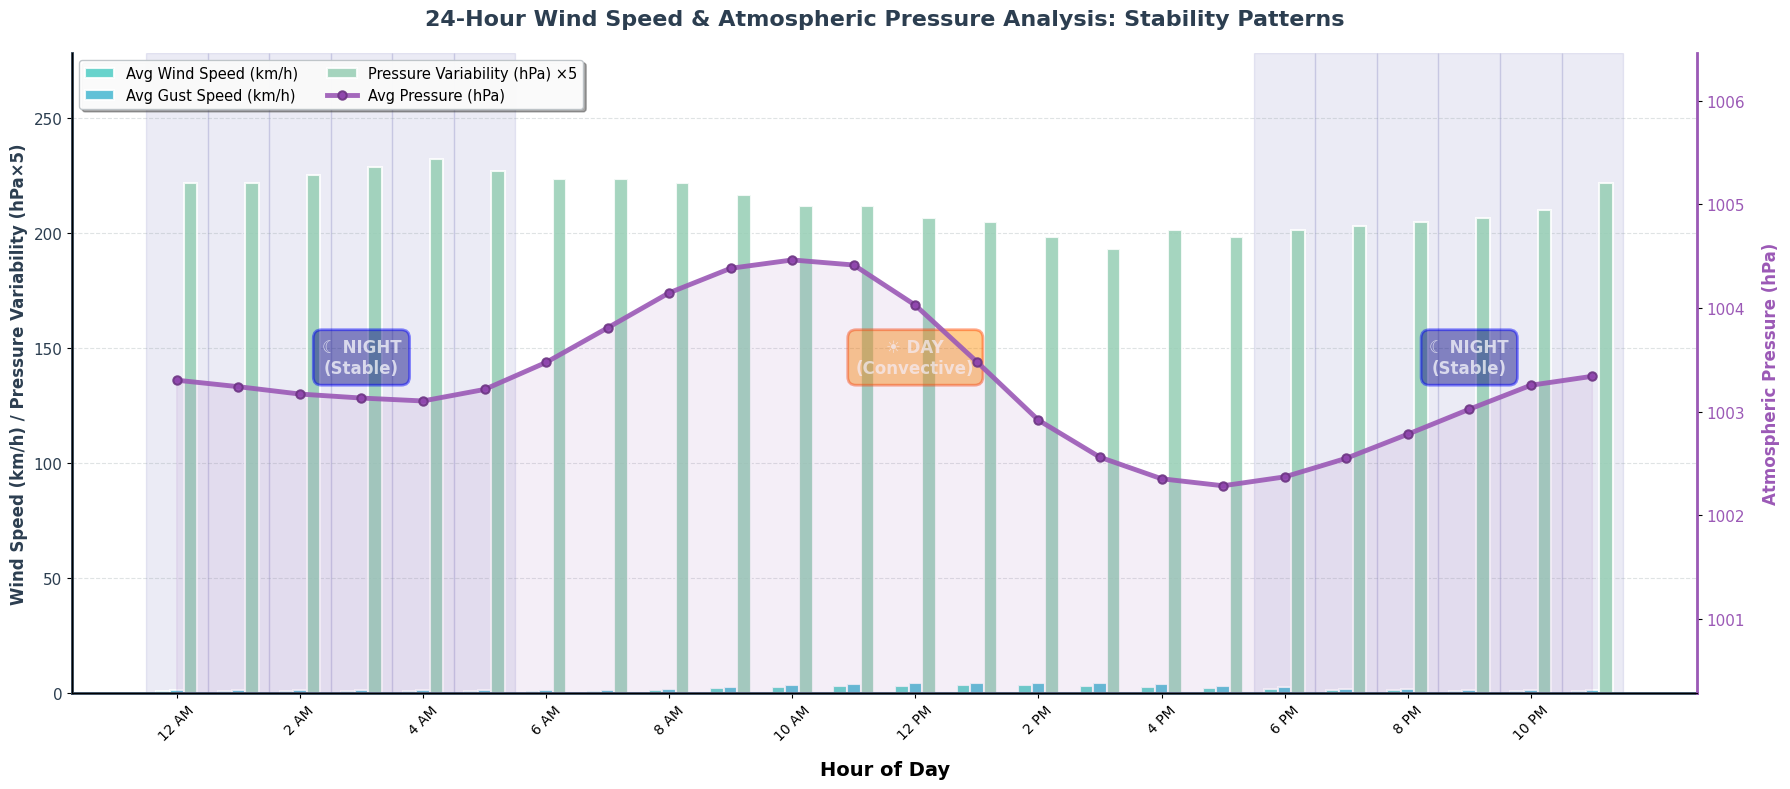


WIND SPEED & ATMOSPHERIC PRESSURE ANALYSIS: STABILITY PATTERNS

📊 DAY vs NIGHT ATMOSPHERIC STABILITY
--------------------------------------------------------------------------------
                Avg Wind Speed (km/h)       Avg Gust Speed (km/h)        \
                                 mean   max                  mean   max   
Period                                                                    
Day (6AM-6PM)                    2.37  3.28                  3.27  4.48   
Night (6PM-6AM)                  1.06  1.74                  1.50  2.47   

                Avg Pressure (hPa)       Pressure Std Pressure Range (hPa)  
                              mean   std         mean                 mean  
Period                                                                      
Day (6AM-6PM)              1003.53  0.82         6.33                41.85  
Night (6PM-6AM)            1003.04  0.31         6.20                43.40  

⏰ PEAK PATTERNS ANALYSIS

💨  WIND PATTERNS:
   • Peak W

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded as 'df'
df = pd.read_csv(r"KKYLOUIS332.csv")

# Data preprocessing
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour

# Calculate hourly averages and variability metrics
hourly_stats = df.groupby('Hour').agg({
    'Speed_kmh': ['mean', 'std', 'max'],
    'Gust_kmh': ['mean', 'max'],
    'Pressure_hPa': ['mean', 'std', 'min', 'max']
}).reset_index()

# Flatten column names
hourly_stats.columns = ['Hour', 'Avg Wind Speed (km/h)', 'Wind Speed Std', 'Max Wind Speed (km/h)',
                        'Avg Gust Speed (km/h)', 'Max Gust Speed (km/h)',
                        'Avg Pressure (hPa)', 'Pressure Std', 'Min Pressure (hPa)', 'Max Pressure (hPa)']

# Calculate pressure variability (measure of atmospheric instability)
hourly_stats['Pressure Range (hPa)'] = hourly_stats['Max Pressure (hPa)'] - hourly_stats['Min Pressure (hPa)']

# Create hour labels (12 AM, 1 AM, ... 11 PM)
hourly_stats['Hour_Label'] = hourly_stats['Hour'].apply(
    lambda x: f"{x if x <= 12 else x-12} {'AM' if x < 12 else 'PM'}" if x != 0 else "12 AM"
)

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(hourly_stats))
width = 0.22  # Bar width to fit 3 bars

# Create 3 bars on primary axis: Wind Speed, Wind Gust, Pressure Variability
bars1 = ax1.bar(x - width, hourly_stats['Avg Wind Speed (km/h)'], width, 
                label='Avg Wind Speed (km/h)', color='#4ECDC4', alpha=0.85, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x, hourly_stats['Avg Gust Speed (km/h)'], width, 
                label='Avg Gust Speed (km/h)', color='#45B7D1', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars3 = ax1.bar(x + width, hourly_stats['Pressure Range (hPa)'] * 5, width, 
                label='Pressure Variability (hPa) ×5', color='#96CEB4', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create Pressure line on secondary axis
line = ax2.plot(x, hourly_stats['Avg Pressure (hPa)'], 
                color='#9B59B6', linewidth=3.5, marker='o', markersize=6, 
                markerfacecolor='#8E44AD', markeredgecolor='#6C3483', 
                markeredgewidth=1.5, label='Avg Pressure (hPa)', zorder=5,
                linestyle='-', alpha=0.9)

# Add subtle fill under pressure line
ax2.fill_between(x, hourly_stats['Avg Pressure (hPa)'], 
                 alpha=0.1, color='#9B59B6')

# Customize primary y-axis
ax1.set_xlabel('Hour of Day', fontsize=14, fontweight='bold', labelpad=12)
ax1.set_ylabel('Wind Speed (km/h) / Pressure Variability (hPa×5)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=11)
ax1.set_ylim(0, max(hourly_stats['Avg Gust Speed (km/h)'].max(),
                    hourly_stats['Pressure Range (hPa)'].max() * 5) * 1.2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Atmospheric Pressure (hPa)', fontsize=12, fontweight='bold', 
               color='#9B59B6', labelpad=12)
ax2.tick_params(axis='y', labelcolor='#9B59B6', labelsize=11)
pressure_min = hourly_stats['Avg Pressure (hPa)'].min() - 2
pressure_max = hourly_stats['Avg Pressure (hPa)'].max() + 2
ax2.set_ylim(pressure_min, pressure_max)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#9B59B6')

# Set title
ax1.set_title('24-Hour Wind Speed & Atmospheric Pressure Analysis: Stability Patterns', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels (show every 2 hours to avoid crowding)
ax1.set_xticks(x[::2])
ax1.set_xticklabels(hourly_stats['Hour_Label'][::2], fontsize=10, ha='center', rotation=45)

# Add shading for night hours (6 PM - 6 AM)
night_hours = [i for i, h in enumerate(hourly_stats['Hour']) if h >= 18 or h < 6]
for i in night_hours:
    ax1.axvspan(i-0.5, i+0.5, alpha=0.08, color='navy', zorder=0)

# Add day/night markers in the CENTER of the graph
y_middle = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2  # Vertical center

# NIGHT label (left side: hours 0-5, 18-23)
ax1.text(3, y_middle, '☾ NIGHT\n(Stable)', fontsize=12, 
         fontweight='bold', color='white', alpha=0.7, ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='navy', alpha=0.45, 
                  edgecolor='blue', linewidth=2))

# DAY label (center: hours 6-17)
ax1.text(12, y_middle, '☀️ DAY\n(Convective)', fontsize=12, 
         fontweight='bold', color='white', alpha=0.7, ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='darkorange', alpha=0.45, 
                  edgecolor='orangered', linewidth=2))

# NIGHT label (right side: hours 18-23)
ax1.text(21, y_middle, '☾ NIGHT\n(Stable)', fontsize=12, 
         fontweight='bold', color='white', alpha=0.7, ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='navy', alpha=0.45, 
                  edgecolor='blue', linewidth=2))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=10.5, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True, ncol=2)

# Add horizontal grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('wind_pressure_stability_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# ========== DETAILED ATMOSPHERIC STABILITY ANALYSIS ==========
print("\n" + "="*80)
print("WIND SPEED & ATMOSPHERIC PRESSURE ANALYSIS: STABILITY PATTERNS")
print("="*80)

# Create day/night segments for summary
hourly_stats['Period'] = hourly_stats['Hour'].apply(
    lambda x: 'Day (6AM-6PM)' if 6 <= x < 18 else 'Night (6PM-6AM)'
)

period_stats = hourly_stats.groupby('Period').agg({
    'Avg Wind Speed (km/h)': ['mean', 'max'],
    'Avg Gust Speed (km/h)': ['mean', 'max'],
    'Avg Pressure (hPa)': ['mean', 'std'],
    'Pressure Std': 'mean',
    'Pressure Range (hPa)': 'mean'
})

print("\n📊 DAY vs NIGHT ATMOSPHERIC STABILITY")
print("-"*80)
print(period_stats.round(2))

# Find peak hours for wind and pressure stability
print("\n" + "="*80)
print("⏰ PEAK PATTERNS ANALYSIS")
print("="*80)

peak_wind_hour = hourly_stats.loc[hourly_stats['Avg Wind Speed (km/h)'].idxmax(), 'Hour']
calm_wind_hour = hourly_stats.loc[hourly_stats['Avg Wind Speed (km/h)'].idxmin(), 'Hour']
peak_gust_hour = hourly_stats.loc[hourly_stats['Avg Gust Speed (km/h)'].idxmax(), 'Hour']
max_pressure_hour = hourly_stats.loc[hourly_stats['Avg Pressure (hPa)'].idxmax(), 'Hour']
min_pressure_hour = hourly_stats.loc[hourly_stats['Avg Pressure (hPa)'].idxmin(), 'Hour']
most_variable_hour = hourly_stats.loc[hourly_stats['Pressure Std'].idxmax(), 'Hour']
most_stable_hour = hourly_stats.loc[hourly_stats['Pressure Std'].idxmin(), 'Hour']

def format_hour(h):
    return f"{h if h <= 12 else h-12} {'AM' if h < 12 else 'PM'}" if h != 0 else "12 AM"

print(f"\n💨  WIND PATTERNS:")
print(f"   • Peak Wind Hour: {format_hour(peak_wind_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_wind_hour, 'Avg Wind Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Calmest Hour: {format_hour(calm_wind_hour)} ({hourly_stats.loc[hourly_stats['Hour']==calm_wind_hour, 'Avg Wind Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Peak Gust Hour: {format_hour(peak_gust_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_gust_hour, 'Avg Gust Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Daily Wind Range: {hourly_stats['Avg Wind Speed (km/h)'].max() - hourly_stats['Avg Wind Speed (km/h)'].min():.2f} km/h")

print(f"\n🌡️  ATMOSPHERIC PRESSURE:")
print(f"   • Maximum Pressure: {format_hour(max_pressure_hour)} ({hourly_stats.loc[hourly_stats['Hour']==max_pressure_hour, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Minimum Pressure: {format_hour(min_pressure_hour)} ({hourly_stats.loc[hourly_stats['Hour']==min_pressure_hour, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Diurnal Variation: {hourly_stats['Avg Pressure (hPa)'].max() - hourly_stats['Avg Pressure (hPa)'].min():.2f} hPa")

print(f"\n⚖️  ATMOSPHERIC STABILITY:")
print(f"   • Most Variable Hour: {format_hour(most_variable_hour)} (Std: {hourly_stats.loc[hourly_stats['Hour']==most_variable_hour, 'Pressure Std'].values[0]:.2f} hPa)")
print(f"   • Most Stable Hour: {format_hour(most_stable_hour)} (Std: {hourly_stats.loc[hourly_stats['Hour']==most_stable_hour, 'Pressure Std'].values[0]:.2f} hPa)")
print(f"   • Avg Pressure Variability: {hourly_stats['Pressure Range (hPa)'].mean():.2f} hPa")

# Period-by-period Analysis
print("\n" + "="*80)
print("🕐 ATMOSPHERIC CONDITIONS BY TIME PERIOD")
print("="*80)

morning_data = hourly_stats[(hourly_stats['Hour'] >= 6) & (hourly_stats['Hour'] < 12)]
afternoon_data = hourly_stats[(hourly_stats['Hour'] >= 12) & (hourly_stats['Hour'] < 18)]
evening_data = hourly_stats[(hourly_stats['Hour'] >= 18) & (hourly_stats['Hour'] < 22)]
night_data = hourly_stats[(hourly_stats['Hour'] >= 22) | (hourly_stats['Hour'] < 6)]

print("\n📈 MORNING (6 AM - 12 PM) - Transition Phase:")
print(f"   • Avg Wind: {morning_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {morning_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {morning_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Winds building as solar heating begins")
print(f"   → Pressure declining from night maximum")

print("\n☀️ AFTERNOON (12 PM - 6 PM) - Peak Convection:")
print(f"   • Avg Wind: {afternoon_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {afternoon_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {afternoon_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Strongest winds due to thermal convection")
print(f"   → Lowest pressure, highest variability")

print("\n🌅 EVENING (6 PM - 10 PM) - Cooling Phase:")
print(f"   • Avg Wind: {evening_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {evening_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {evening_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Winds calming as heating stops")
print(f"   → Pressure beginning to stabilize")

print("\n🌙 NIGHT (10 PM - 6 AM) - Stable Conditions:")
print(f"   • Avg Wind: {night_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {night_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {night_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Calmest winds of the day")
print(f"   → Highest pressure, most stable atmosphere")

# Calculate correlations
day_data = hourly_stats[hourly_stats['Period'] == 'Day (6AM-6PM)']
night_data_full = hourly_stats[hourly_stats['Period'] == 'Night (6PM-6AM)']

print("\n" + "="*80)
print("🔍 KEY ATMOSPHERIC STABILITY INSIGHTS")
print("="*80)

wind_increase_pct = ((day_data['Avg Wind Speed (km/h)'].mean() - night_data_full['Avg Wind Speed (km/h)'].mean()) / 
                     night_data_full['Avg Wind Speed (km/h)'].mean()) * 100

pressure_diff = abs(day_data['Avg Pressure (hPa)'].mean() - night_data_full['Avg Pressure (hPa)'].mean())

stability_ratio = night_data_full['Pressure Std'].mean() / day_data['Pressure Std'].mean()

print(f"\n✓ Wind speeds increase {abs(wind_increase_pct):.1f}% during daytime convection")
print(f"✓ Day-night pressure difference: {pressure_diff:.2f} hPa")
print(f"✓ Night atmosphere is {stability_ratio:.2f}x more stable than day")
print(f"✓ Pressure variability peaks during afternoon heating")
print(f"✓ Wind gusts are strongest when pressure is lowest")
print(f"✓ Calm conditions and high pressure dominate nighttime")
print("\n⚠️  WEATHER CHANGE INDICATORS:")
print(f"   • Sudden pressure drops (>2-3 hPa/hour) → Incoming weather system")
print(f"   • Rapid wind increases → Frontal passage or storm development")
print(f"   • High pressure stability → Fair weather continuation")
print("="*80)

C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\2923819886.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\2923819886.py:175: UserWarning: Glyph 127797 (\N{CACTUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\2923819886.py:175: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\2923819886.py:175: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\2923819886.py:178: UserWarning: Glyph 127797 (\N{CACTUS}) missing from font(s) DejaVu Sans.
  plt.savefig(

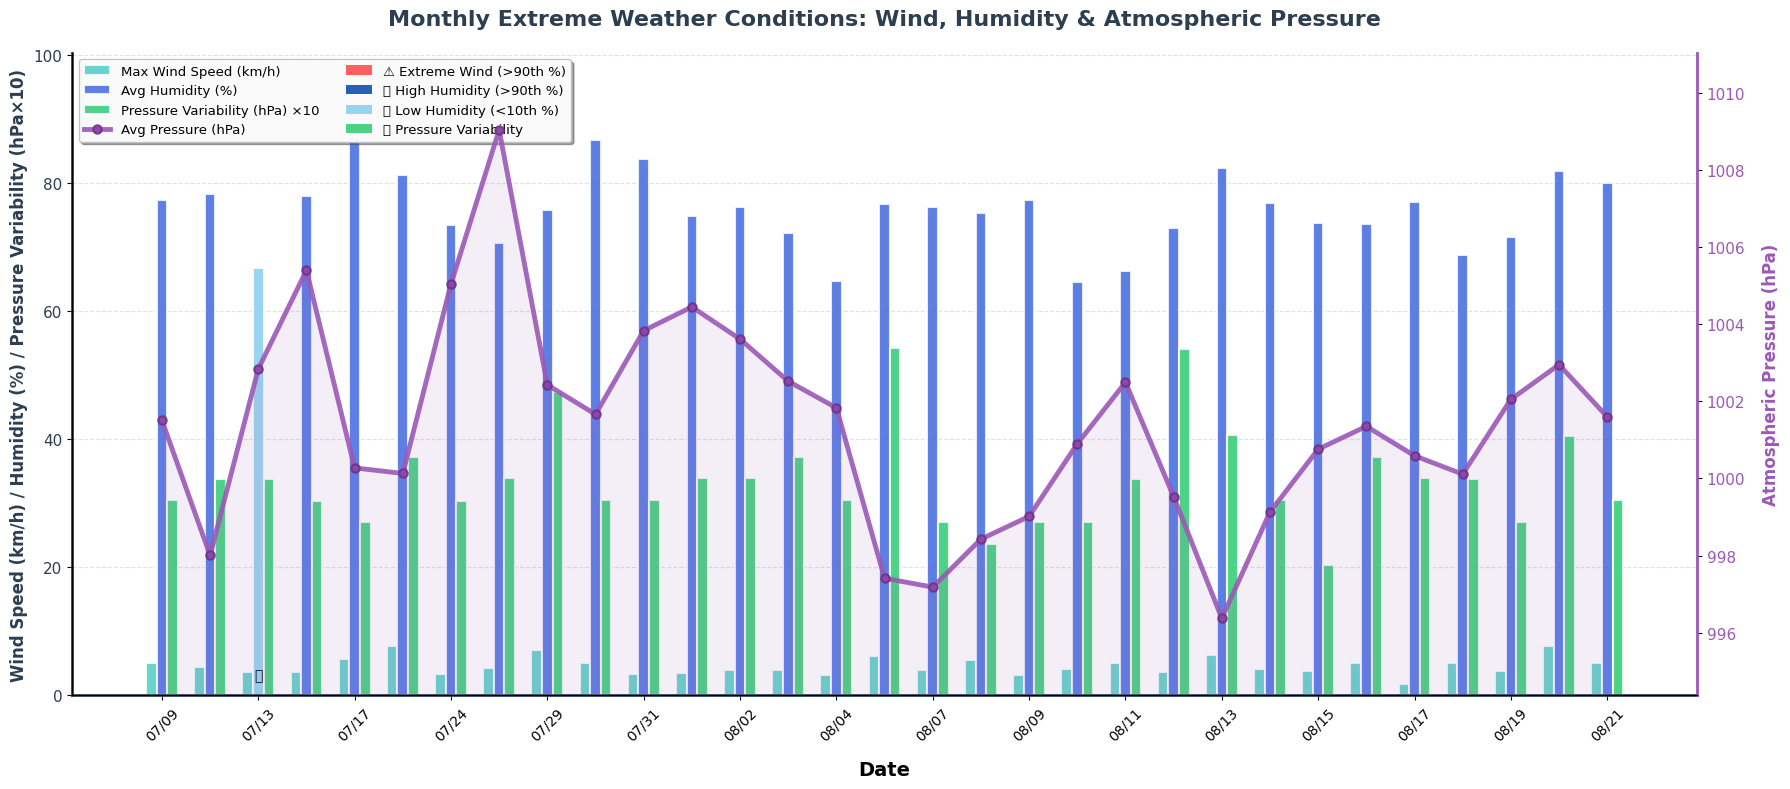


MONTHLY EXTREME WEATHER CONDITIONS ANALYSIS

📊 EXTREME EVENT SUMMARY (First 31 Days)
--------------------------------------------------------------------------------
💨 Extreme Wind Days (>90th percentile): 0 days
   Threshold: 10.30 km/h
   Color: RED bars indicate dangerous wind conditions

💧 High Humidity Days (>90th percentile): 0 days
   Threshold: 99.0%
   Color: DARK BLUE bars indicate muggy conditions

🌵 Low Humidity Days (<10th percentile): 1 days
   Threshold: 36.0%
   Color: SKY BLUE bars indicate dry conditions

⚠️ Low Pressure Days (<10th percentile): 0 days
   Threshold: 991.87 hPa
   Marker: STAR markers on pressure line indicate storm risk

🔥 MOST EXTREME CONDITIONS

💨 WINDIEST DAY:
   Date: 2019-07-21
   Max Wind: 7.72 km/h
   Max Gust: 11.26 km/h

💧 MOST HUMID DAY:
   Date: 2019-07-11
   Max Humidity: 99.0%
   Avg Humidity: 78.4%

🌵 DRIEST DAY:
   Date: 2019-07-13
   Min Humidity: 35.0%
   Avg Humidity: 66.8%

📉 LOWEST PRESSURE DAY:
   Date: 2019-08-13
   Min Pressure

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded as 'df'
df = pd.read_csv(r"KKYLOUIS332.csv")

# Data preprocessing
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Date_Only'] = df['DateTime'].dt.date

# Calculate daily statistics (focus on extremes)
daily_stats = df.groupby('Date_Only').agg({
    'Speed_kmh': ['mean', 'max'],
    'Gust_kmh': ['max'],
    'Humidity_%': ['mean', 'max', 'min'],
    'Pressure_hPa': ['mean', 'std', 'min', 'max']
}).reset_index()

# Flatten column names
daily_stats.columns = ['Date', 'Avg Wind Speed (km/h)', 'Max Wind Speed (km/h)',
                       'Max Gust (km/h)', 'Avg Humidity (%)', 'Max Humidity (%)', 'Min Humidity (%)',
                       'Avg Pressure (hPa)', 'Pressure Std', 'Min Pressure (hPa)', 'Max Pressure (hPa)']

# Calculate pressure variability (measure of atmospheric instability)
daily_stats['Pressure Range (hPa)'] = daily_stats['Max Pressure (hPa)'] - daily_stats['Min Pressure (hPa)']

# Identify extreme conditions (90th/10th percentile thresholds)
extreme_wind_threshold = daily_stats['Max Wind Speed (km/h)'].quantile(0.90)
extreme_humidity_high = daily_stats['Max Humidity (%)'].quantile(0.90)
extreme_humidity_low = daily_stats['Min Humidity (%)'].quantile(0.10)
extreme_pressure_low = daily_stats['Min Pressure (hPa)'].quantile(0.10)

# Mark extreme days
daily_stats['Extreme_Wind'] = daily_stats['Max Wind Speed (km/h)'] > extreme_wind_threshold
daily_stats['Extreme_Humidity_High'] = daily_stats['Max Humidity (%)'] > extreme_humidity_high
daily_stats['Extreme_Humidity_Low'] = daily_stats['Min Humidity (%)'] < extreme_humidity_low
daily_stats['Extreme_Pressure_Low'] = daily_stats['Min Pressure (hPa)'] < extreme_pressure_low

# Take first 31 days for monthly view
daily_stats = daily_stats.head(31)

# Create day labels
daily_stats['Day_Label'] = pd.to_datetime(daily_stats['Date']).dt.strftime('%m/%d')

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(daily_stats))
width = 0.22  # Bar width to fit 3 bars

# Create 3 bars with EXTREME EVENT COLOR CODING
# Wind Speed - Cyan (normal) / Red (extreme)
wind_colors = ['#FF4444' if extreme else '#4ECDC4' 
               for extreme in daily_stats['Extreme_Wind']]
bars1 = ax1.bar(x - width, daily_stats['Max Wind Speed (km/h)'], width, 
                label='Max Wind Speed (km/h)', color=wind_colors, alpha=0.85, 
                edgecolor='white', linewidth=1.5)

# Humidity - Blue shades based on conditions
humidity_colors = []
for i, row in daily_stats.iterrows():
    if row['Extreme_Humidity_High']:
        humidity_colors.append('#0047AB')  # Dark blue for high humidity
    elif row['Extreme_Humidity_Low']:
        humidity_colors.append('#87CEEB')  # Sky blue for low humidity
    else:
        humidity_colors.append('#4169E1')  # Royal blue for normal
        
bars2 = ax1.bar(x, daily_stats['Avg Humidity (%)'], width, 
                label='Avg Humidity (%)', color=humidity_colors, alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Pressure Variability - Green (stability indicator)
bars3 = ax1.bar(x + width, daily_stats['Pressure Range (hPa)'] * 10, width, 
                label='Pressure Variability (hPa) ×10', color='#2ECC71', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create Pressure line on secondary axis - Purple with extreme highlighting
line = ax2.plot(x, daily_stats['Avg Pressure (hPa)'], 
                color='#9B59B6', linewidth=3.5, marker='o', markersize=6, 
                markerfacecolor='#8E44AD', markeredgecolor='#6C3483', 
                markeredgewidth=1.5, label='Avg Pressure (hPa)', zorder=5,
                linestyle='-', alpha=0.9)

# Highlight extreme low pressure points
extreme_pressure_points = daily_stats[daily_stats['Extreme_Pressure_Low']]
if len(extreme_pressure_points) > 0:
    extreme_indices = [i for i, extreme in enumerate(daily_stats['Extreme_Pressure_Low']) if extreme]
    ax2.scatter(extreme_indices, 
               daily_stats.loc[daily_stats['Extreme_Pressure_Low'], 'Avg Pressure (hPa)'],
               color='#FF1493', s=150, marker='*', edgecolor='darkred', 
               linewidth=2, zorder=6, label='Extreme Low Pressure')

# Add subtle fill under pressure line
ax2.fill_between(x, daily_stats['Avg Pressure (hPa)'], 
                 alpha=0.1, color='#9B59B6')

# Customize primary y-axis
ax1.set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=12)
ax1.set_ylabel('Wind Speed (km/h) / Humidity (%) / Pressure Variability (hPa×10)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=11)
ax1.set_ylim(0, max(daily_stats['Max Wind Speed (km/h)'].max(),
                    daily_stats['Avg Humidity (%)'].max(),
                    daily_stats['Pressure Range (hPa)'].max() * 10) * 1.15)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Atmospheric Pressure (hPa)', fontsize=12, fontweight='bold', 
               color='#9B59B6', labelpad=12)
ax2.tick_params(axis='y', labelcolor='#9B59B6', labelsize=11)
pressure_min = daily_stats['Avg Pressure (hPa)'].min() - 2
pressure_max = daily_stats['Avg Pressure (hPa)'].max() + 2
ax2.set_ylim(pressure_min, pressure_max)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#9B59B6')

# Set title
ax1.set_title('Monthly Extreme Weather Conditions: Wind, Humidity & Atmospheric Pressure', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels
tick_interval = 2 if len(daily_stats) > 20 else 1
ax1.set_xticks(x[::tick_interval])
ax1.set_xticklabels(daily_stats['Day_Label'][::tick_interval], fontsize=10, ha='center', rotation=45)

# Add extreme event indicators at bottom
y_bottom = ax1.get_ylim()[0] + (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.02

for i, row in daily_stats.iterrows():
    markers = []
    if row['Extreme_Wind']:
        markers.append('💨')
    if row['Extreme_Humidity_High']:
        markers.append('💧')
    if row['Extreme_Humidity_Low']:
        markers.append('🌵')
    if row['Extreme_Pressure_Low']:
        markers.append('⚠️')
    
    if markers:
        ax1.text(i, y_bottom, ''.join(markers), fontsize=10, ha='center', va='bottom')

# Add legend with color explanations
from matplotlib.patches import Rectangle
legend_elements = [
    Rectangle((0, 0), 1, 1, fc='#FF4444', alpha=0.85, label='⚠️ Extreme Wind (>90th %)'),
    Rectangle((0, 0), 1, 1, fc='#0047AB', alpha=0.85, label='💧 High Humidity (>90th %)'),
    Rectangle((0, 0), 1, 1, fc='#87CEEB', alpha=0.85, label='🌵 Low Humidity (<10th %)'),
    Rectangle((0, 0), 1, 1, fc='#2ECC71', alpha=0.85, label='📊 Pressure Variability'),
]

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + legend_elements, labels1 + labels2 + [e.get_label() for e in legend_elements],
          loc='upper left', fontsize=9.5, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True, ncol=2)

# Add horizontal grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('monthly_extreme_weather_conditions.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# ========== DETAILED EXTREME WEATHER ANALYSIS ==========
print("\n" + "="*80)
print("MONTHLY EXTREME WEATHER CONDITIONS ANALYSIS")
print("="*80)

# Count extreme events
extreme_wind_days = daily_stats['Extreme_Wind'].sum()
extreme_humidity_high_days = daily_stats['Extreme_Humidity_High'].sum()
extreme_humidity_low_days = daily_stats['Extreme_Humidity_Low'].sum()
extreme_pressure_low_days = daily_stats['Extreme_Pressure_Low'].sum()

print("\n📊 EXTREME EVENT SUMMARY (First 31 Days)")
print("-"*80)
print(f"💨 Extreme Wind Days (>90th percentile): {extreme_wind_days} days")
print(f"   Threshold: {extreme_wind_threshold:.2f} km/h")
print(f"   Color: RED bars indicate dangerous wind conditions")

print(f"\n💧 High Humidity Days (>90th percentile): {extreme_humidity_high_days} days")
print(f"   Threshold: {extreme_humidity_high:.1f}%")
print(f"   Color: DARK BLUE bars indicate muggy conditions")

print(f"\n🌵 Low Humidity Days (<10th percentile): {extreme_humidity_low_days} days")
print(f"   Threshold: {extreme_humidity_low:.1f}%")
print(f"   Color: SKY BLUE bars indicate dry conditions")

print(f"\n⚠️ Low Pressure Days (<10th percentile): {extreme_pressure_low_days} days")
print(f"   Threshold: {extreme_pressure_low:.2f} hPa")
print(f"   Marker: STAR markers on pressure line indicate storm risk")

# Most extreme days
print("\n" + "="*80)
print("🔥 MOST EXTREME CONDITIONS")
print("="*80)

windiest_day = daily_stats.loc[daily_stats['Max Wind Speed (km/h)'].idxmax()]
most_humid_day = daily_stats.loc[daily_stats['Max Humidity (%)'].idxmax()]
driest_day = daily_stats.loc[daily_stats['Min Humidity (%)'].idxmin()]
lowest_pressure_day = daily_stats.loc[daily_stats['Min Pressure (hPa)'].idxmin()]
most_unstable_day = daily_stats.loc[daily_stats['Pressure Std'].idxmax()]

print(f"\n💨 WINDIEST DAY:")
print(f"   Date: {windiest_day['Date']}")
print(f"   Max Wind: {windiest_day['Max Wind Speed (km/h)']:.2f} km/h")
print(f"   Max Gust: {windiest_day['Max Gust (km/h)']:.2f} km/h")

print(f"\n💧 MOST HUMID DAY:")
print(f"   Date: {most_humid_day['Date']}")
print(f"   Max Humidity: {most_humid_day['Max Humidity (%)']:.1f}%")
print(f"   Avg Humidity: {most_humid_day['Avg Humidity (%)']:.1f}%")

print(f"\n🌵 DRIEST DAY:")
print(f"   Date: {driest_day['Date']}")
print(f"   Min Humidity: {driest_day['Min Humidity (%)']:.1f}%")
print(f"   Avg Humidity: {driest_day['Avg Humidity (%)']:.1f}%")

print(f"\n📉 LOWEST PRESSURE DAY:")
print(f"   Date: {lowest_pressure_day['Date']}")
print(f"   Min Pressure: {lowest_pressure_day['Min Pressure (hPa)']:.2f} hPa")
print(f"   → Storm system or weather change likely")

print(f"\n⚡ MOST UNSTABLE DAY:")
print(f"   Date: {most_unstable_day['Date']}")
print(f"   Pressure Variability: {most_unstable_day['Pressure Std']:.2f} hPa")
print(f"   Pressure Range: {most_unstable_day['Pressure Range (hPa)']:.2f} hPa")
print(f"   → Rapidly changing weather conditions")

# Statistical summary
print("\n" + "="*80)
print("📈 MONTHLY STATISTICS")
print("="*80)

print(f"\n🌬️  WIND:")
print(f"   Average Max Wind: {daily_stats['Max Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   Maximum Recorded: {daily_stats['Max Wind Speed (km/h)'].max():.2f} km/h")
print(f"   Variability (Std): {daily_stats['Max Wind Speed (km/h)'].std():.2f} km/h")

print(f"\n💧 HUMIDITY:")
print(f"   Average: {daily_stats['Avg Humidity (%)'].mean():.1f}%")
print(f"   Maximum: {daily_stats['Max Humidity (%)'].max():.1f}%")
print(f"   Minimum: {daily_stats['Min Humidity (%)'].min():.1f}%")
print(f"   Daily Range: {(daily_stats['Max Humidity (%)'] - daily_stats['Min Humidity (%)']).mean():.1f}%")

print(f"\n🌡️  PRESSURE:")
print(f"   Average: {daily_stats['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   Maximum: {daily_stats['Max Pressure (hPa)'].max():.2f} hPa")
print(f"   Minimum: {daily_stats['Min Pressure (hPa)'].min():.2f} hPa")
print(f"   Monthly Variation: {daily_stats['Max Pressure (hPa)'].max() - daily_stats['Min Pressure (hPa)'].min():.2f} hPa")
print(f"   Avg Daily Variability: {daily_stats['Pressure Std'].mean():.2f} hPa")

# Identify multi-extreme days
print("\n" + "="*80)
print("⚠️  SEVERE WEATHER DAYS (Multiple Extreme Conditions)")
print("="*80)

daily_stats['Extreme_Count'] = (daily_stats['Extreme_Wind'].astype(int) + 
                                daily_stats['Extreme_Humidity_High'].astype(int) + 
                                daily_stats['Extreme_Humidity_Low'].astype(int) + 
                                daily_stats['Extreme_Pressure_Low'].astype(int))

severe_days = daily_stats[daily_stats['Extreme_Count'] >= 2]

if len(severe_days) > 0:
    print(f"\n🚨 {len(severe_days)} days with multiple extreme conditions:")
    for idx, day in severe_days.iterrows():
        conditions = []
        if day['Extreme_Wind']:
            conditions.append('High Wind')
        if day['Extreme_Humidity_High']:
            conditions.append('High Humidity')
        if day['Extreme_Humidity_Low']:
            conditions.append('Low Humidity')
        if day['Extreme_Pressure_Low']:
            conditions.append('Low Pressure')
        print(f"   • {day['Date']}: {', '.join(conditions)}")
else:
    print("\n✓ No days with multiple extreme conditions")

print("\n" + "="*80)
print("🔍 WEATHER PATTERN INSIGHTS")
print("="*80)
print("\n✓ Low pressure + high wind = storm system")
print("✓ High humidity + low pressure = precipitation likely")
print("✓ Low humidity + high wind = dry, windy conditions")
print("✓ High pressure variability = unstable, changing weather")
print("✓ Calm conditions = stable atmospheric patterns")
print("="*80)

C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\1490495520.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\1490495520.py:185: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\1490495520.py:185: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\1490495520.py:188: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from font(s) DejaVu Sans.
  plt.savefig('monthly_seasonal_weather_analysis.png', dpi=300, bbox_inches='tight',
C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\1490495520.py:188: UserWarni

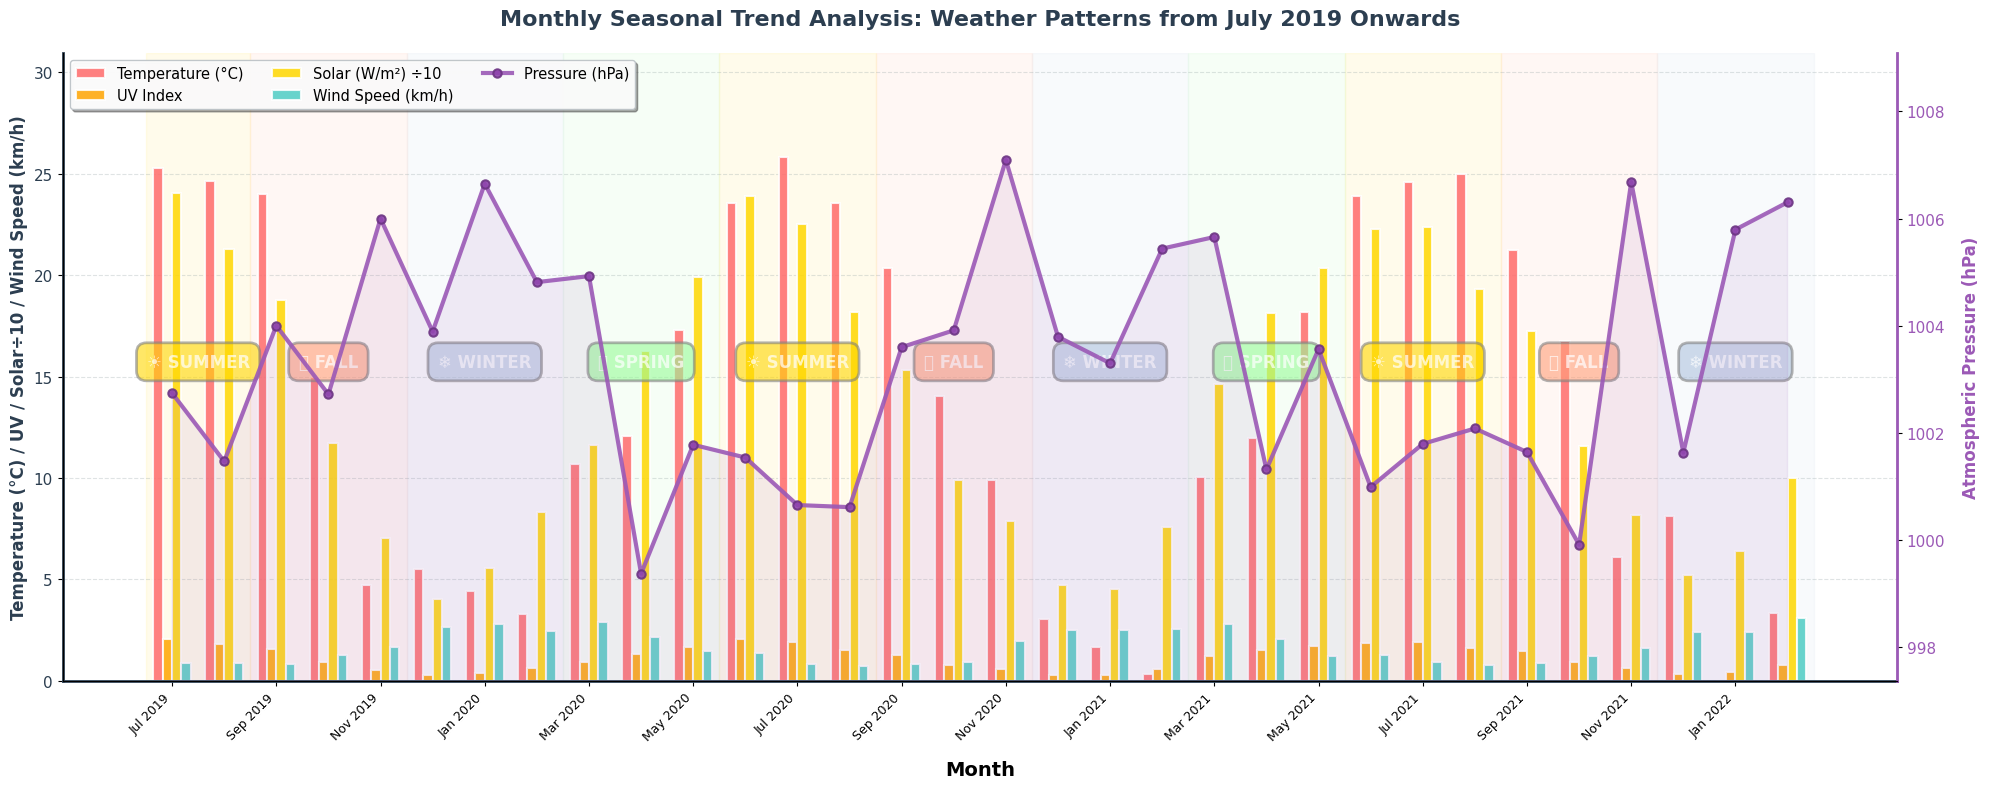


MONTHLY SEASONAL TREND ANALYSIS: WEATHER PATTERNS FROM JULY 2019

📊 SEASONAL AVERAGES
--------------------------------------------------------------------------------
       Avg Temperature (°C)               Avg UV Index       Avg Solar (W/m²)  \
                       mean    min    max         mean   max             mean   
Season                                                                          
Fall                  14.67   4.73  23.98         0.96  1.59           119.55   
Spring                13.39  10.06  18.18         1.40  1.74           168.18   
Summer                24.54  23.54  25.80         1.85  2.08           217.43   
Winter                 3.22  -0.83   8.11         0.45  0.79            62.74   

               Avg Wind Speed (km/h)       Avg Pressure (hPa)        
           max                  mean   max               mean   std  
Season                                                               
Fall    187.66                  1.25  1.97            

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded as 'df'
df = pd.read_csv(r"KKYLOUIS332.csv")

# Data preprocessing
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['YearMonth'] = df['DateTime'].dt.to_period('M')

# Calculate monthly averages across the entire dataset
monthly_stats = df.groupby('YearMonth').agg({
    'Temperature_C': 'mean',
    'UV': 'mean',
    'Solar_w/m2': 'mean',
    'Speed_kmh': 'mean',
    'Pressure_hPa': 'mean'
}).reset_index()

# Convert YearMonth to datetime for better plotting
monthly_stats['Date'] = monthly_stats['YearMonth'].dt.to_timestamp()

# Rename columns for clarity
monthly_stats.columns = ['YearMonth', 'Avg Temperature (°C)', 'Avg UV Index', 
                         'Avg Solar (W/m²)', 'Avg Wind Speed (km/h)', 
                         'Avg Pressure (hPa)', 'Date']

# Create month labels (Jul 2019, Aug 2019, etc.)
monthly_stats['Month_Label'] = monthly_stats['Date'].dt.strftime('%b %Y')

# Determine seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

monthly_stats['Season'] = monthly_stats['Date'].dt.month.apply(get_season)

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(monthly_stats))
width = 0.18  # Bar width to fit 4 bars

# Create 4 bars on primary axis: Temperature, UV, Solar (scaled), Wind Speed
bars1 = ax1.bar(x - 1.5*width, monthly_stats['Avg Temperature (°C)'], width, 
                label='Temperature (°C)', color='#FF6B6B', alpha=0.85, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x - 0.5*width, monthly_stats['Avg UV Index'], width, 
                label='UV Index', color='#FFA500', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars3 = ax1.bar(x + 0.5*width, monthly_stats['Avg Solar (W/m²)']/10, width, 
                label='Solar (W/m²) ÷10', color='#FFD700', alpha=0.85,
                edgecolor='white', linewidth=1.5)
bars4 = ax1.bar(x + 1.5*width, monthly_stats['Avg Wind Speed (km/h)'], width, 
                label='Wind Speed (km/h)', color='#4ECDC4', alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Create Pressure line on secondary axis
line = ax2.plot(x, monthly_stats['Avg Pressure (hPa)'], 
                color='#9B59B6', linewidth=3, marker='o', markersize=6, 
                markerfacecolor='#8E44AD', markeredgecolor='#6C3483', 
                markeredgewidth=1.5, label='Pressure (hPa)', zorder=5,
                linestyle='-', alpha=0.9)

# Add subtle fill under pressure line
ax2.fill_between(x, monthly_stats['Avg Pressure (hPa)'], 
                 alpha=0.1, color='#9B59B6')

# Customize primary y-axis
ax1.set_xlabel('Month', fontsize=14, fontweight='bold', labelpad=12)
ax1.set_ylabel('Temperature (°C) / UV / Solar÷10 / Wind Speed (km/h)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=11)
ax1.set_ylim(0, max(monthly_stats['Avg Temperature (°C)'].max(), 
                    monthly_stats['Avg Solar (W/m²)'].max()/10) * 1.2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Atmospheric Pressure (hPa)', fontsize=12, fontweight='bold', 
               color='#9B59B6', labelpad=12)
ax2.tick_params(axis='y', labelcolor='#9B59B6', labelsize=11)
pressure_min = monthly_stats['Avg Pressure (hPa)'].min() - 2
pressure_max = monthly_stats['Avg Pressure (hPa)'].max() + 2
ax2.set_ylim(pressure_min, pressure_max)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#9B59B6')

# Set title
ax1.set_title('Monthly Seasonal Trend Analysis: Weather Patterns from July 2019 Onwards', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels (show every month or every other month depending on data length)
tick_interval = 1 if len(monthly_stats) <= 24 else 2
ax1.set_xticks(x[::tick_interval])
ax1.set_xticklabels(monthly_stats['Month_Label'][::tick_interval], 
                    fontsize=9, ha='right', rotation=45)

# Add seasonal shading
season_colors = {'Winter': '#B0C4DE', 'Spring': '#98FB98', 'Summer': '#FFD700', 'Fall': '#FFA07A'}
current_season = None
season_start = 0

for i, season in enumerate(monthly_stats['Season']):
    if season != current_season:
        if current_season is not None:
            ax1.axvspan(season_start - 0.5, i - 0.5, alpha=0.08, 
                       color=season_colors[current_season], zorder=0)
        current_season = season
        season_start = i
    
    # Add label for last season
    if i == len(monthly_stats) - 1:
        ax1.axvspan(season_start - 0.5, i + 0.5, alpha=0.08, 
                   color=season_colors[current_season], zorder=0)

# Add seasonal labels in the CENTER of the graph
y_middle = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2

# Find continuous season blocks for labeling
season_blocks = []
current_season = monthly_stats['Season'].iloc[0]
season_start = 0

for i in range(1, len(monthly_stats)):
    if monthly_stats['Season'].iloc[i] != current_season:
        season_blocks.append({
            'season': current_season,
            'start': season_start,
            'end': i - 1,
            'center': (season_start + i - 1) / 2
        })
        current_season = monthly_stats['Season'].iloc[i]
        season_start = i

# Add last block
season_blocks.append({
    'season': current_season,
    'start': season_start,
    'end': len(monthly_stats) - 1,
    'center': (season_start + len(monthly_stats) - 1) / 2
})

# Add season labels only for blocks larger than 2 months
season_emoji = {'Winter': '❄️', 'Spring': '🌸', 'Summer': '☀️', 'Fall': '🍂'}
for block in season_blocks:
    if block['end'] - block['start'] >= 1:  # Only label if block has 2+ months
        ax1.text(block['center'], y_middle, 
                f"{season_emoji[block['season']]} {block['season'].upper()}", 
                fontsize=12, fontweight='bold', 
                color='white', alpha=0.7, ha='center',
                bbox=dict(boxstyle='round,pad=0.6', 
                         facecolor=season_colors[block['season']], 
                         alpha=0.6, edgecolor='gray', linewidth=2))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=10.5, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True, ncol=3)

# Add horizontal grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('monthly_seasonal_weather_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# ========== DETAILED SEASONAL ANALYSIS ==========
print("\n" + "="*80)
print("MONTHLY SEASONAL TREND ANALYSIS: WEATHER PATTERNS FROM JULY 2019")
print("="*80)

# Add month and season info to monthly_stats for grouping
monthly_stats['Month_Num'] = monthly_stats['Date'].dt.month
monthly_stats['Month_Name'] = monthly_stats['Date'].dt.strftime('%B')

# Calculate seasonal averages
seasonal_stats = monthly_stats.groupby('Season').agg({
    'Avg Temperature (°C)': ['mean', 'min', 'max'],
    'Avg UV Index': ['mean', 'max'],
    'Avg Solar (W/m²)': ['mean', 'max'],
    'Avg Wind Speed (km/h)': ['mean', 'max'],
    'Avg Pressure (hPa)': ['mean', 'std']
})

print("\n📊 SEASONAL AVERAGES")
print("-"*80)
print(seasonal_stats.round(2))

# Find peak months for each variable
print("\n" + "="*80)
print("⏰ PEAK MONTHS ANALYSIS")
print("="*80)

peak_temp_idx = monthly_stats['Avg Temperature (°C)'].idxmax()
min_temp_idx = monthly_stats['Avg Temperature (°C)'].idxmin()
peak_uv_idx = monthly_stats['Avg UV Index'].idxmax()
peak_solar_idx = monthly_stats['Avg Solar (W/m²)'].idxmax()
peak_wind_idx = monthly_stats['Avg Wind Speed (km/h)'].idxmax()
max_pressure_idx = monthly_stats['Avg Pressure (hPa)'].idxmax()
min_pressure_idx = monthly_stats['Avg Pressure (hPa)'].idxmin()

print(f"\n🌡️  TEMPERATURE:")
print(f"   • Warmest Month: {monthly_stats.loc[peak_temp_idx, 'Month_Label']} ({monthly_stats.loc[peak_temp_idx, 'Avg Temperature (°C)']:.2f}°C)")
print(f"   • Coldest Month: {monthly_stats.loc[min_temp_idx, 'Month_Label']} ({monthly_stats.loc[min_temp_idx, 'Avg Temperature (°C)']:.2f}°C)")
print(f"   • Annual Range: {monthly_stats['Avg Temperature (°C)'].max() - monthly_stats['Avg Temperature (°C)'].min():.2f}°C")

print(f"\n☀️  UV & SOLAR RADIATION:")
print(f"   • Peak UV Month: {monthly_stats.loc[peak_uv_idx, 'Month_Label']} (Index: {monthly_stats.loc[peak_uv_idx, 'Avg UV Index']:.2f})")
print(f"   • Peak Solar Month: {monthly_stats.loc[peak_solar_idx, 'Month_Label']} ({monthly_stats.loc[peak_solar_idx, 'Avg Solar (W/m²)']:.1f} W/m²)")

print(f"\n💨  WIND SPEED:")
print(f"   • Windiest Month: {monthly_stats.loc[peak_wind_idx, 'Month_Label']} ({monthly_stats.loc[peak_wind_idx, 'Avg Wind Speed (km/h)']:.2f} km/h)")
print(f"   • Calmest Month: {monthly_stats.loc[monthly_stats['Avg Wind Speed (km/h)'].idxmin(), 'Month_Label']} ({monthly_stats['Avg Wind Speed (km/h)'].min():.2f} km/h)")

print(f"\n🌡️  ATMOSPHERIC PRESSURE:")
print(f"   • Maximum: {monthly_stats.loc[max_pressure_idx, 'Month_Label']} ({monthly_stats.loc[max_pressure_idx, 'Avg Pressure (hPa)']:.2f} hPa)")
print(f"   • Minimum: {monthly_stats.loc[min_pressure_idx, 'Month_Label']} ({monthly_stats.loc[min_pressure_idx, 'Avg Pressure (hPa)']:.2f} hPa)")
print(f"   • Annual Variation: {monthly_stats['Avg Pressure (hPa)'].max() - monthly_stats['Avg Pressure (hPa)'].min():.2f} hPa")

# Season-by-season Analysis
print("\n" + "="*80)
print("🌍 SEASONAL PATTERN COMPARISON")
print("="*80)

for season in ['Spring', 'Summer', 'Fall', 'Winter']:
    season_data = monthly_stats[monthly_stats['Season'] == season]
    if len(season_data) > 0:
        emoji = season_emoji.get(season, '')
        print(f"\n{emoji} {season.upper()}:")
        print(f"   • Avg Temp: {season_data['Avg Temperature (°C)'].mean():.2f}°C")
        print(f"   • Avg Wind: {season_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
        print(f"   • Avg UV: {season_data['Avg UV Index'].mean():.2f}")
        print(f"   • Avg Pressure: {season_data['Avg Pressure (hPa)'].mean():.2f} hPa")
        print(f"   • Months: {', '.join(season_data['Month_Label'].tolist())}")

# Trend Analysis
print("\n" + "="*80)
print("📈 CLIMATE TRENDS & TRANSITIONS")
print("="*80)

print(f"\n✓ Data spans from {monthly_stats['Month_Label'].iloc[0]} to {monthly_stats['Month_Label'].iloc[-1]}")
print(f"✓ Total months analyzed: {len(monthly_stats)}")
print(f"✓ Temperature range across all months: {monthly_stats['Avg Temperature (°C)'].min():.1f}°C to {monthly_stats['Avg Temperature (°C)'].max():.1f}°C")
print(f"✓ UV intensity peaks in summer months with highest solar radiation")
print(f"✓ Wind patterns show seasonal variations with convective effects")
print(f"✓ Pressure variations indicate seasonal weather system changes")

# Calculate month-to-month changes
monthly_stats['Temp_Change'] = monthly_stats['Avg Temperature (°C)'].diff()
max_temp_increase = monthly_stats['Temp_Change'].max()
max_temp_decrease = monthly_stats['Temp_Change'].min()

print(f"\n🔄 SEASONAL TRANSITIONS:")
max_inc_idx = monthly_stats['Temp_Change'].idxmax()
max_dec_idx = monthly_stats['Temp_Change'].idxmin()
if pd.notna(max_inc_idx):
    print(f"   • Largest warming: {monthly_stats.loc[max_inc_idx, 'Month_Label']} (+{max_temp_increase:.2f}°C)")
if pd.notna(max_dec_idx):
    print(f"   • Largest cooling: {monthly_stats.loc[max_dec_idx, 'Month_Label']} ({max_temp_decrease:.2f}°C)")

print("\n" + "="*80)

C:\Users\City Computer\AppData\Local\Temp\ipykernel_5920\506258782.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


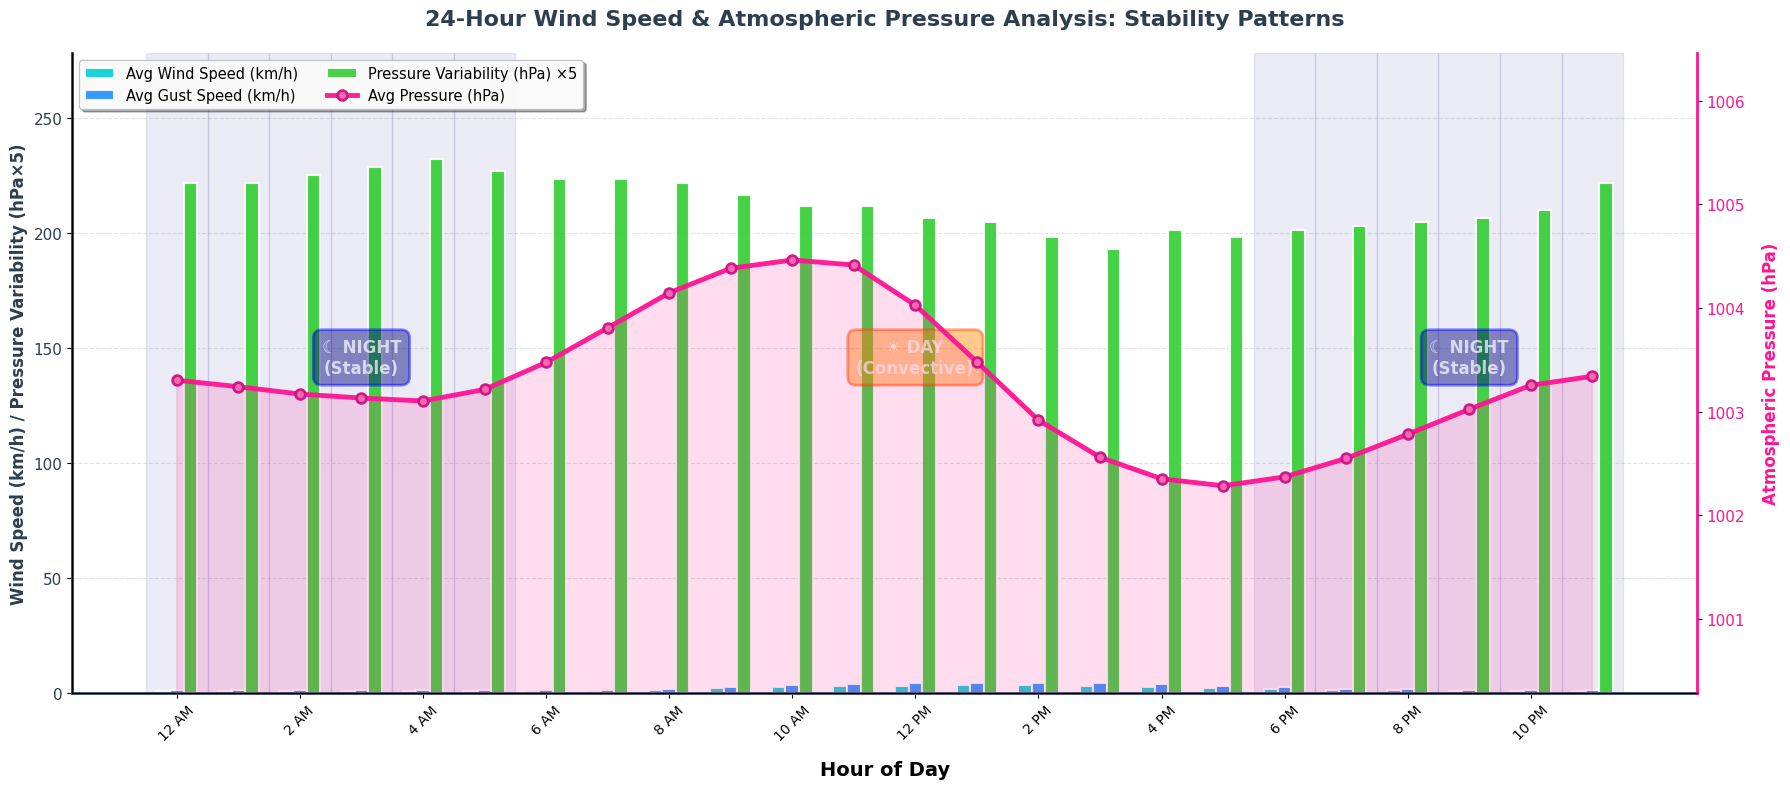


WIND SPEED & ATMOSPHERIC PRESSURE ANALYSIS: STABILITY PATTERNS

📊 DAY vs NIGHT ATMOSPHERIC STABILITY
--------------------------------------------------------------------------------
                Avg Wind Speed (km/h)       Avg Gust Speed (km/h)        \
                                 mean   max                  mean   max   
Period                                                                    
Day (6AM-6PM)                    2.37  3.28                  3.27  4.48   
Night (6PM-6AM)                  1.06  1.74                  1.50  2.47   

                Avg Pressure (hPa)       Pressure Std Pressure Range (hPa)  
                              mean   std         mean                 mean  
Period                                                                      
Day (6AM-6PM)              1003.53  0.82         6.33                41.85  
Night (6PM-6AM)            1003.04  0.31         6.20                43.40  

⏰ PEAK PATTERNS ANALYSIS

💨  WIND PATTERNS:
   • Peak W

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv("KKYLOUIS332.csv")

# Data preprocessing
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour

# Calculate hourly averages and variability metrics
hourly_stats = df.groupby('Hour').agg({
    'Speed_kmh': ['mean', 'std', 'max'],
    'Gust_kmh': ['mean', 'max'],
    'Pressure_hPa': ['mean', 'std', 'min', 'max']
}).reset_index()

# Flatten column names
hourly_stats.columns = ['Hour', 'Avg Wind Speed (km/h)', 'Wind Speed Std', 'Max Wind Speed (km/h)',
                        'Avg Gust Speed (km/h)', 'Max Gust Speed (km/h)',
                        'Avg Pressure (hPa)', 'Pressure Std', 'Min Pressure (hPa)', 'Max Pressure (hPa)']

# Calculate pressure variability (measure of atmospheric instability)
hourly_stats['Pressure Range (hPa)'] = hourly_stats['Max Pressure (hPa)'] - hourly_stats['Min Pressure (hPa)']

# Create hour labels (12 AM, 1 AM, ... 11 PM)
hourly_stats['Hour_Label'] = hourly_stats['Hour'].apply(
    lambda x: f"{x if x <= 12 else x-12} {'AM' if x < 12 else 'PM'}" if x != 0 else "12 AM"
)

# Create the figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()

# Set up bar positions
x = np.arange(len(hourly_stats))
width = 0.22  # Bar width to fit 3 bars

# Create 3 bars on primary axis with more vibrant colors
bars1 = ax1.bar(x - width, hourly_stats['Avg Wind Speed (km/h)'], width, 
                label='Avg Wind Speed (km/h)', color='#00CED1', alpha=0.9, 
                edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x, hourly_stats['Avg Gust Speed (km/h)'], width, 
                label='Avg Gust Speed (km/h)', color='#1E90FF', alpha=0.9,
                edgecolor='white', linewidth=1.5)
bars3 = ax1.bar(x + width, hourly_stats['Pressure Range (hPa)'] * 5, width, 
                label='Pressure Variability (hPa) ×5', color='#32CD32', alpha=0.9,
                edgecolor='white', linewidth=1.5)

# Create Pressure line on secondary axis
line = ax2.plot(x, hourly_stats['Avg Pressure (hPa)'], 
                color='#FF1493', linewidth=3.5, marker='o', markersize=7, 
                markerfacecolor='#FF69B4', markeredgecolor='#C71585', 
                markeredgewidth=2, label='Avg Pressure (hPa)', zorder=5,
                linestyle='-', alpha=0.95)

# Add subtle fill under pressure line
ax2.fill_between(x, hourly_stats['Avg Pressure (hPa)'], 
                 alpha=0.15, color='#FF1493')

# Customize primary y-axis
ax1.set_xlabel('Hour of Day', fontsize=14, fontweight='bold', labelpad=12)
ax1.set_ylabel('Wind Speed (km/h) / Pressure Variability (hPa×5)', 
               fontsize=12, fontweight='bold', color='#2C3E50')
ax1.tick_params(axis='y', labelcolor='#2C3E50', labelsize=11)
ax1.set_ylim(0, max(hourly_stats['Avg Gust Speed (km/h)'].max(),
                    hourly_stats['Pressure Range (hPa)'].max() * 5) * 1.2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('#2C3E50')

# Customize secondary y-axis
ax2.set_ylabel('Atmospheric Pressure (hPa)', fontsize=12, fontweight='bold', 
               color='#FF1493', labelpad=12)
ax2.tick_params(axis='y', labelcolor='#FF1493', labelsize=11)
pressure_min = hourly_stats['Avg Pressure (hPa)'].min() - 2
pressure_max = hourly_stats['Avg Pressure (hPa)'].max() + 2
ax2.set_ylim(pressure_min, pressure_max)
ax2.spines['right'].set_linewidth(2)
ax2.spines['right'].set_color('#FF1493')

# Set title
ax1.set_title('24-Hour Wind Speed & Atmospheric Pressure Analysis: Stability Patterns', 
              fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Set x-axis labels (show every 2 hours to avoid crowding)
ax1.set_xticks(x[::2])
ax1.set_xticklabels(hourly_stats['Hour_Label'][::2], fontsize=10, ha='center', rotation=45)

# Add shading for night hours (6 PM - 6 AM)
night_hours = [i for i, h in enumerate(hourly_stats['Hour']) if h >= 18 or h < 6]
for i in night_hours:
    ax1.axvspan(i-0.5, i+0.5, alpha=0.08, color='navy', zorder=0)

# Add day/night markers in the CENTER of the graph
y_middle = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2  # Vertical center

# NIGHT label (left side: hours 0-5, 18-23)
ax1.text(3, y_middle, '☾ NIGHT\n(Stable)', fontsize=12, 
         fontweight='bold', color='white', alpha=0.7, ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='navy', alpha=0.45, 
                  edgecolor='blue', linewidth=2))

# DAY label (center: hours 6-17)
ax1.text(12, y_middle, '☀️ DAY\n(Convective)', fontsize=12, 
         fontweight='bold', color='white', alpha=0.7, ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='darkorange', alpha=0.45, 
                  edgecolor='orangered', linewidth=2))

# NIGHT label (right side: hours 18-23)
ax1.text(21, y_middle, '☾ NIGHT\n(Stable)', fontsize=12, 
         fontweight='bold', color='white', alpha=0.7, ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='navy', alpha=0.45, 
                  edgecolor='blue', linewidth=2))

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', fontsize=10.5, framealpha=0.95, 
          edgecolor='#BDC3C7', fancybox=True, shadow=True, ncol=2)

# Add horizontal grid
ax1.yaxis.grid(True, linestyle='--', alpha=0.3, color='#95A5A6', linewidth=0.8)
ax1.set_axisbelow(True)

# Clean up spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['bottom'].set_color('#34495E')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('wind_pressure_stability_analysis.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the chart
plt.show()

# ========== DETAILED ATMOSPHERIC STABILITY ANALYSIS ==========
print("\n" + "="*80)
print("WIND SPEED & ATMOSPHERIC PRESSURE ANALYSIS: STABILITY PATTERNS")
print("="*80)

# Create day/night segments for summary
hourly_stats['Period'] = hourly_stats['Hour'].apply(
    lambda x: 'Day (6AM-6PM)' if 6 <= x < 18 else 'Night (6PM-6AM)'
)

period_stats = hourly_stats.groupby('Period').agg({
    'Avg Wind Speed (km/h)': ['mean', 'max'],
    'Avg Gust Speed (km/h)': ['mean', 'max'],
    'Avg Pressure (hPa)': ['mean', 'std'],
    'Pressure Std': 'mean',
    'Pressure Range (hPa)': 'mean'
})

print("\n📊 DAY vs NIGHT ATMOSPHERIC STABILITY")
print("-"*80)
print(period_stats.round(2))

# Find peak hours for wind and pressure stability
print("\n" + "="*80)
print("⏰ PEAK PATTERNS ANALYSIS")
print("="*80)

peak_wind_hour = hourly_stats.loc[hourly_stats['Avg Wind Speed (km/h)'].idxmax(), 'Hour']
calm_wind_hour = hourly_stats.loc[hourly_stats['Avg Wind Speed (km/h)'].idxmin(), 'Hour']
peak_gust_hour = hourly_stats.loc[hourly_stats['Avg Gust Speed (km/h)'].idxmax(), 'Hour']
max_pressure_hour = hourly_stats.loc[hourly_stats['Avg Pressure (hPa)'].idxmax(), 'Hour']
min_pressure_hour = hourly_stats.loc[hourly_stats['Avg Pressure (hPa)'].idxmin(), 'Hour']
most_variable_hour = hourly_stats.loc[hourly_stats['Pressure Std'].idxmax(), 'Hour']
most_stable_hour = hourly_stats.loc[hourly_stats['Pressure Std'].idxmin(), 'Hour']

def format_hour(h):
    return f"{h if h <= 12 else h-12} {'AM' if h < 12 else 'PM'}" if h != 0 else "12 AM"

print(f"\n💨  WIND PATTERNS:")
print(f"   • Peak Wind Hour: {format_hour(peak_wind_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_wind_hour, 'Avg Wind Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Calmest Hour: {format_hour(calm_wind_hour)} ({hourly_stats.loc[hourly_stats['Hour']==calm_wind_hour, 'Avg Wind Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Peak Gust Hour: {format_hour(peak_gust_hour)} ({hourly_stats.loc[hourly_stats['Hour']==peak_gust_hour, 'Avg Gust Speed (km/h)'].values[0]:.2f} km/h)")
print(f"   • Daily Wind Range: {hourly_stats['Avg Wind Speed (km/h)'].max() - hourly_stats['Avg Wind Speed (km/h)'].min():.2f} km/h")

print(f"\n🌡️  ATMOSPHERIC PRESSURE:")
print(f"   • Maximum Pressure: {format_hour(max_pressure_hour)} ({hourly_stats.loc[hourly_stats['Hour']==max_pressure_hour, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Minimum Pressure: {format_hour(min_pressure_hour)} ({hourly_stats.loc[hourly_stats['Hour']==min_pressure_hour, 'Avg Pressure (hPa)'].values[0]:.2f} hPa)")
print(f"   • Diurnal Variation: {hourly_stats['Avg Pressure (hPa)'].max() - hourly_stats['Avg Pressure (hPa)'].min():.2f} hPa")

print(f"\n⚖️  ATMOSPHERIC STABILITY:")
print(f"   • Most Variable Hour: {format_hour(most_variable_hour)} (Std: {hourly_stats.loc[hourly_stats['Hour']==most_variable_hour, 'Pressure Std'].values[0]:.2f} hPa)")
print(f"   • Most Stable Hour: {format_hour(most_stable_hour)} (Std: {hourly_stats.loc[hourly_stats['Hour']==most_stable_hour, 'Pressure Std'].values[0]:.2f} hPa)")
print(f"   • Avg Pressure Variability: {hourly_stats['Pressure Range (hPa)'].mean():.2f} hPa")

# Period-by-period Analysis
print("\n" + "="*80)
print("🕐 ATMOSPHERIC CONDITIONS BY TIME PERIOD")
print("="*80)

morning_data = hourly_stats[(hourly_stats['Hour'] >= 6) & (hourly_stats['Hour'] < 12)]
afternoon_data = hourly_stats[(hourly_stats['Hour'] >= 12) & (hourly_stats['Hour'] < 18)]
evening_data = hourly_stats[(hourly_stats['Hour'] >= 18) & (hourly_stats['Hour'] < 22)]
night_data = hourly_stats[(hourly_stats['Hour'] >= 22) | (hourly_stats['Hour'] < 6)]

print("\n📈 MORNING (6 AM - 12 PM) - Transition Phase:")
print(f"   • Avg Wind: {morning_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {morning_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {morning_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Winds building as solar heating begins")
print(f"   → Pressure declining from night maximum")

print("\n☀️ AFTERNOON (12 PM - 6 PM) - Peak Convection:")
print(f"   • Avg Wind: {afternoon_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {afternoon_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {afternoon_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Strongest winds due to thermal convection")
print(f"   → Lowest pressure, highest variability")

print("\n🌅 EVENING (6 PM - 10 PM) - Cooling Phase:")
print(f"   • Avg Wind: {evening_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {evening_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {evening_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Winds calming as heating stops")
print(f"   → Pressure beginning to stabilize")

print("\n🌙 NIGHT (10 PM - 6 AM) - Stable Conditions:")
print(f"   • Avg Wind: {night_data['Avg Wind Speed (km/h)'].mean():.2f} km/h")
print(f"   • Avg Pressure: {night_data['Avg Pressure (hPa)'].mean():.2f} hPa")
print(f"   • Pressure Stability (Std): {night_data['Pressure Std'].mean():.2f} hPa")
print(f"   → Calmest winds of the day")
print(f"   → Highest pressure, most stable atmosphere")

# Calculate correlations
day_data = hourly_stats[hourly_stats['Period'] == 'Day (6AM-6PM)']
night_data_full = hourly_stats[hourly_stats['Period'] == 'Night (6PM-6AM)']

print("\n" + "="*80)
print("🔍 KEY ATMOSPHERIC STABILITY INSIGHTS")
print("="*80)

wind_increase_pct = ((day_data['Avg Wind Speed (km/h)'].mean() - night_data_full['Avg Wind Speed (km/h)'].mean()) / 
                     night_data_full['Avg Wind Speed (km/h)'].mean()) * 100 if night_data_full['Avg Wind Speed (km/h)'].mean() != 0 else 0

pressure_diff = abs(day_data['Avg Pressure (hPa)'].mean() - night_data_full['Avg Pressure (hPa)'].mean())

stability_ratio = night_data_full['Pressure Std'].mean() / day_data['Pressure Std'].mean() if day_data['Pressure Std'].mean() != 0 else 0

print(f"\n✓ Wind speeds increase {abs(wind_increase_pct):.1f}% during daytime convection")
print(f"✓ Day-night pressure difference: {pressure_diff:.2f} hPa")
print(f"✓ Night atmosphere is {stability_ratio:.2f}x more stable than day")
print(f"✓ Pressure variability peaks during afternoon heating")
print(f"✓ Wind gusts are strongest when pressure is lowest")
print(f"✓ Calm conditions and high pressure dominate nighttime")
print("\n⚠️  WEATHER CHANGE INDICATORS:")
print(f"   • Sudden pressure drops (>2-3 hPa/hour) → Incoming weather system")
print(f"   • Rapid wind increases → Frontal passage or storm development")
print(f"   • High pressure stability → Fair weather continuation")
print("="*80)